In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
parse_dates = ['release_date']
df = pd.read_csv("Data/clean_movie_data.csv", parse_dates=parse_dates)
df.head()

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_4484/103010525.py:2: DtypeWarning: Columns (1,2,4,18,19,20,21,23,25,27,28,29,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/clean_movie_data.csv", parse_dates=parse_dates)


Unnamed: 0  adult    budget original_language popularity release_date  \
0           0  False  30000000                en  21.946943   1995-10-30   
1           1  False  65000000                en  17.015539   1995-12-15   
2           2  False         0                en    11.7129   1995-12-22   
3           3  False  16000000                en   3.859495   1995-12-22   
4           4  False         0                en   8.387519   1995-02-10   

     status  vote_average  vote_count  movieId  ...  \
0  Released           7.7      5415.0      NaN  ...   
1  Released           6.9      2413.0      NaN  ...   
2  Released           6.5        92.0      NaN  ...   
3  Released           6.1        34.0      NaN  ...   
4  Released           5.7       173.0      NaN  ...   

  genre_Telescene Film Group Productions  genre_The Cartel genre_Thriller  \
0                                      0                 0              0   
1                                      0                 0              0   
2                                      0                 0              0   
3                                      0                 0              0   
4                                      0                 0              0   

  genre_Vision View Entertainment genre_War genre_Western      revenue  \
0                               0         0             0  373554033.0   
1                               0         0             0  262797249.0   
2                               0         0             0          0.0   
3                               0         0             0   81452156.0   
4                               0         0             0   76578911.0   

   runtime release_year                  movie_title  
0     81.0       1995.0                    Toy Story  
1    104.0       1995.0                      Jumanji  
2    101.0       1995.0             Grumpier Old Men  
3    127.0       1995.0            Waiting to Exhale  
4    106.0       1995.0  Father of the Bride Part II  

[5 rows x 75 columns]

In [4]:
df.shape

(1306179, 75)

In [5]:
df.columns

Index(['Unnamed: 0', 'adult', 'budget', 'original_language', 'popularity',
       'release_date', 'status', 'vote_average', 'vote_count', 'movieId',
       'certificate', 'rating', 'director', 'director_id', 'star', 'star_id',
       'votes', 'collection_id', 'collection_name', 'spoken_language_1',
       'spoken_language_2', 'production_company_1_name',
       'production_company_1_id', 'production_company_2_name',
       'production_company_2_id', 'production_company_3_name',
       'production_company_3_id', 'production_country_1_name',
       'production_country_2_name', 'production_country_3_name',
       'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation',
       'genre_Aniplex', 'genre_BROSTA TV', 'genre_Biography',
       'genre_Carousel Productions', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Foreign', 'genre_Game-Show', 'genre_GoHands',
       'genre_History', 'gen

In [6]:
interesting_columns = ['adult', 'budget', 'original_language', 'popularity', 'release_date', 'status', 
                       'rating', 'vote_average', 'vote_count', 'certificate', 'director', 'director_id',
                       'star', 'star_id', 'votes', 'revenue', 'runtime', 'release_year']

genre_columns = ['genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation',
       'genre_Biography', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Foreign', 'genre_Game-Show',
       'genre_History', 'genre_Horror', 'genre_Music',
       'genre_Musical', 'genre_Mystery', 'genre_News','genre_Reality-TV',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Science Fiction',
       'genre_Sport', 'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western']

all_columns = interesting_columns + genre_columns

In [7]:
df[interesting_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306179 entries, 0 to 1306178
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   adult              1306157 non-null  object        
 1   budget             1306157 non-null  object        
 2   original_language  1306145 non-null  object        
 3   popularity         1306152 non-null  object        
 4   release_date       1083710 non-null  datetime64[ns]
 5   status             1306069 non-null  object        
 6   rating             732552 non-null   float64       
 7   vote_average       1306151 non-null  float64       
 8   vote_count         1306151 non-null  float64       
 9   certificate        332166 non-null   object        
 10  director           1151279 non-null  object        
 11  director_id        1151279 non-null  object        
 12  star               1040268 non-null  object        
 13  star_id            1070897 

### Check Any Missing Values

In [8]:
df[interesting_columns].isna().sum()

adult                    22
budget                   22
original_language        34
popularity               27
release_date         222469
status                  110
rating               573627
vote_average             28
vote_count               28
certificate          974013
director             154900
director_id          154900
star                 265911
star_id              235282
votes                573576
revenue                  26
runtime               53919
release_year          35926
dtype: int64

### Data Type Transformation

In [9]:
adult = np.logical_or(df['adult'] == True, df['adult'] == 'True')

df['adult'] = adult

In [10]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [11]:
null_budget = df['budget'].isna()
df = df.drop(index=df[null_budget].index)

In [12]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

In [13]:
null_pupularity = df['popularity'].isna()
df = df.drop(index=df[null_pupularity].index)

In [14]:
df.shape

(1306151, 75)

In [15]:
df[df['runtime'].str.contains("min", na=False)]['runtime'].shape

(94587,)

In [16]:
df['runtime'] = df['runtime'].map(str)
df['runtime'] = df['runtime'].str.replace("min", "")
df['runtime'] = df['runtime'].str.replace(",", "")
df['runtime'] = pd.to_numeric(df['runtime'], errors="coerce")

In [17]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [18]:
null_reselase_year = df['release_year'].isna()
df = df.drop(index=df[null_reselase_year].index)

In [19]:
df[interesting_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262692 entries, 0 to 1306156
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   adult              1262692 non-null  bool          
 1   budget             1262692 non-null  float64       
 2   original_language  1262680 non-null  object        
 3   popularity         1262692 non-null  float64       
 4   release_date       1083710 non-null  datetime64[ns]
 5   status             1262611 non-null  object        
 6   rating             732522 non-null   float64       
 7   vote_average       1262692 non-null  float64       
 8   vote_count         1262692 non-null  float64       
 9   certificate        331741 non-null   object        
 10  director           1125745 non-null  object        
 11  director_id        1125745 non-null  object        
 12  star               1028339 non-null  object        
 13  star_id            1056766 

In [20]:
df.shape

(1262692, 75)

### Exploratory Data Analysis

In [21]:
### Check the missing values, since it will affect some statistics.
df[interesting_columns].isna().sum()

adult                     0
budget                    0
original_language        12
popularity                0
release_date         178982
status                   81
rating               530170
vote_average              0
vote_count                0
certificate          930951
director             136947
director_id          136947
star                 234353
star_id              205926
votes                530119
revenue                   0
runtime               53899
release_year              0
dtype: int64

In [22]:
# Check possible incorrect data
df[interesting_columns].describe()

budget    popularity         rating  vote_average    vote_count  \
count  1.262692e+06  1.262692e+06  732522.000000  1.262692e+06  1.262692e+06   
mean   3.311379e+05  9.106868e-01       5.726692  4.204739e+00  1.165841e+01   
std    3.470690e+06  1.818036e+00       1.354367  3.287193e+00  9.770471e+01   
min    0.000000e+00  0.000000e+00       1.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.529400e-02       4.900000  0.000000e+00  0.000000e+00   
50%    0.000000e+00  2.024680e-01       5.800000  5.000000e+00  2.000000e+00   
75%    0.000000e+00  1.116784e+00       6.600000  6.600000e+00  5.000000e+00   
max    3.800000e+08  5.474883e+02      10.000000  1.000000e+01  1.407500e+04   

              votes       revenue       runtime  release_year  
count  7.325730e+05  1.262692e+06  1.208793e+06  1.262692e+06  
mean   1.359401e+04  4.101961e+05  7.405316e+01  1.999435e+03  
std    7.744286e+04  1.253826e+07  5.020367e+01  1.600838e+01  
min    5.000000e+00  0.000000e+00  0.000000e+00  1.874000e+03  
25%    2.900000e+01  0.000000e+00  3.800000e+01  1.993000e+03  
50%    1.320000e+02  0.000000e+00  8.700000e+01  2.004000e+03  
75%    1.015000e+03  0.000000e+00  1.000000e+02  2.009000e+03  
max    2.675531e+06  2.787965e+09  2.160000e+03  2.029000e+03

In [23]:
total = df.shape[0]

In [24]:
# 0 in Budget, revenue, and runtime doesn't make sense.
zero_budget = df['budget'] == 0
df[zero_budget].shape

(1119908, 75)

#### Why budget data is zero?
- Data is not available.
- The budget is really low.

In [25]:
df[interesting_columns][zero_budget].describe()

budget    popularity         rating  vote_average    vote_count  \
count  1119908.0  1.119908e+06  646174.000000  1.119908e+06  1.119908e+06   
mean         0.0  9.548355e-01       5.726765  4.108424e+00  9.122577e+00   
std          0.0  1.462147e+00       1.354435  3.475364e+00  1.805697e+01   
min          0.0  0.000000e+00       1.000000  0.000000e+00  0.000000e+00   
25%          0.0  9.226000e-03       4.900000  0.000000e+00  0.000000e+00   
50%          0.0  4.144740e-01       5.800000  6.300000e+00  2.000000e+00   
75%          0.0  1.233673e+00       6.600000  6.800000e+00  1.200000e+01   
max          0.0  6.795505e+01      10.000000  1.000000e+01  1.730000e+03   

              votes       revenue       runtime  release_year  
count  6.462190e+05  1.119908e+06  1.066019e+06  1.119908e+06  
mean   1.359797e+04  2.125168e+04  6.997332e+01  2.000305e+03  
std    7.745270e+04  1.139778e+06  5.203079e+01  1.567686e+01  
min    5.000000e+00  0.000000e+00  0.000000e+00  1.874000e+03  
25%    2.900000e+01  0.000000e+00  0.000000e+00  1.995000e+03  
50%    1.320000e+02  0.000000e+00  8.200000e+01  2.005000e+03  
75%    1.015000e+03  0.000000e+00  1.000000e+02  2.009000e+03  
max    2.675531e+06  3.552983e+08  2.160000e+03  2.029000e+03

#### According to the statistics of zero-budget movies. Most movies are
- Really low popularity.
- Low vote counts which means that only a few people watch them.
- Low revenue.

#### Conclusion
- Instead of removing them, I convert the column into categorical column and put them into the low-budget category.

In [26]:
# Categorizing budget column.

def budget_category(value):
    high = 40000000
    mid = 4500000

    if value > high:
        return 'high'
    elif value > mid:
        return 'mid'
    else:
        return 'low'

In [27]:
df['budget_class'] = df['budget'].map(budget_category)
interesting_columns.append('budget_class')
df[interesting_columns]

adult      budget original_language  popularity release_date  \
0        False  30000000.0                en   21.946943   1995-10-30   
1        False  65000000.0                en   17.015539   1995-12-15   
2        False         0.0                en   11.712900   1995-12-22   
3        False  16000000.0                en    3.859495   1995-12-22   
4        False         0.0                en    8.387519   1995-02-10   
...        ...         ...               ...         ...          ...   
1306151  False         0.0                en    5.683753   1991-05-13   
1306153  False         0.0                tl    0.178241   2011-11-17   
1306154  False         0.0                en    0.903007   2003-08-01   
1306155  False         0.0                en    0.003503   1917-10-21   
1306156  False         0.0                en    0.163015   2017-06-09   

           status  rating  vote_average  vote_count certificate director  \
0        Released     NaN           7.7      5415.0         NaN      NaN   
1        Released     NaN           6.9      2413.0         NaN      NaN   
2        Released     NaN           6.5        92.0         NaN      NaN   
3        Released     NaN           6.1        34.0         NaN      NaN   
4        Released     NaN           5.7       173.0         NaN      NaN   
...           ...     ...           ...         ...         ...      ...   
1306151  Released     NaN           5.7        26.0         NaN      NaN   
1306153  Released     NaN           9.0         3.0         NaN      NaN   
1306154  Released     NaN           3.8         6.0         NaN      NaN   
1306155  Released     NaN           0.0         0.0         NaN      NaN   
1306156  Released     NaN           0.0         0.0         NaN      NaN   

        director_id star star_id  votes      revenue  runtime  release_year  \
0               NaN  NaN     NaN    NaN  373554033.0     81.0        1995.0   
1               NaN  NaN     NaN    NaN  262797249.0    104.0        1995.0   
2               NaN  NaN     NaN    NaN          0.0    101.0        1995.0   
3               NaN  NaN     NaN    NaN   81452156.0    127.0        1995.0   
4               NaN  NaN     NaN    NaN   76578911.0    106.0        1995.0   
...             ...  ...     ...    ...          ...      ...           ...   
1306151         NaN  NaN     NaN    NaN          0.0    104.0        1991.0   
1306153         NaN  NaN     NaN    NaN          0.0    360.0        2011.0   
1306154         NaN  NaN     NaN    NaN          0.0     90.0        2003.0   
1306155         NaN  NaN     NaN    NaN          0.0     87.0        1917.0   
1306156         NaN  NaN     NaN    NaN          0.0     75.0        2017.0   

        budget_class  
0                mid  
1               high  
2                low  
3                mid  
4                low  
...              ...  
1306151          low  
1306153          low  
1306154          low  
1306155          low  
1306156          low  

[1262692 rows x 19 columns]

In [28]:
zero_revenue = df['revenue'] == 0

In [29]:
df[interesting_columns][zero_revenue].describe()

budget    popularity         rating  vote_average    vote_count  \
count  1.255186e+06  1.255186e+06  732031.000000  1.255186e+06  1.255186e+06   
mean   1.978310e+05  8.648228e-01       5.726679  4.192703e+00  8.369830e+00   
std    9.542235e+05  1.408579e+00       1.354521  3.292356e+00  1.708496e+01   
min    0.000000e+00  0.000000e+00       1.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.529400e-02       4.900000  0.000000e+00  0.000000e+00   
50%    0.000000e+00  2.024680e-01       5.800000  5.000000e+00  2.000000e+00   
75%    0.000000e+00  1.116784e+00       6.600000  6.600000e+00  5.000000e+00   
max    1.500000e+08  7.880720e+01      10.000000  1.000000e+01  1.730000e+03   

              votes    revenue       runtime  release_year  
count  7.320820e+05  1255186.0  1.201293e+06  1.255186e+06  
mean   1.360020e+04        0.0  7.384316e+01  1.999434e+03  
std    7.746035e+04        0.0  5.026098e+01  1.601149e+01  
min    5.000000e+00        0.0  0.000000e+00  1.874000e+03  
25%    2.900000e+01        0.0  3.800000e+01  1.993000e+03  
50%    1.320000e+02        0.0  8.700000e+01  2.004000e+03  
75%    1.016000e+03        0.0  1.000000e+02  2.009000e+03  
max    2.675531e+06        0.0  2.160000e+03  2.029000e+03

In [30]:
df[interesting_columns][zero_revenue].describe()

budget    popularity         rating  vote_average    vote_count  \
count  1.255186e+06  1.255186e+06  732031.000000  1.255186e+06  1.255186e+06   
mean   1.978310e+05  8.648228e-01       5.726679  4.192703e+00  8.369830e+00   
std    9.542235e+05  1.408579e+00       1.354521  3.292356e+00  1.708496e+01   
min    0.000000e+00  0.000000e+00       1.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.529400e-02       4.900000  0.000000e+00  0.000000e+00   
50%    0.000000e+00  2.024680e-01       5.800000  5.000000e+00  2.000000e+00   
75%    0.000000e+00  1.116784e+00       6.600000  6.600000e+00  5.000000e+00   
max    1.500000e+08  7.880720e+01      10.000000  1.000000e+01  1.730000e+03   

              votes    revenue       runtime  release_year  
count  7.320820e+05  1255186.0  1.201293e+06  1.255186e+06  
mean   1.360020e+04        0.0  7.384316e+01  1.999434e+03  
std    7.746035e+04        0.0  5.026098e+01  1.601149e+01  
min    5.000000e+00        0.0  0.000000e+00  1.874000e+03  
25%    2.900000e+01        0.0  3.800000e+01  1.993000e+03  
50%    1.320000e+02        0.0  8.700000e+01  2.004000e+03  
75%    1.016000e+03        0.0  1.000000e+02  2.009000e+03  
max    2.675531e+06        0.0  2.160000e+03  2.029000e+03

#### Checking statistics of movies with 0 revenue.
- Their popularity are low.
- Low vote counts which means that not a lot of people watch them.
- Zero budgets (I consider them as low budget.)
- Low ratings.

#### Conclusion
Since no movies should have zero revenue, I will just classified them as low-income movies.

In [31]:
df['revenue'].describe()

count    1.262692e+06
mean     4.101961e+05
std      1.253826e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [32]:
revenue_classes, c = pd.cut(df['revenue'], 6, labels=[0, 1, 2, 3, 4, 5], retbins = True)

In [33]:
revenue_classes.unique()

[0, 1, 3, 2, 5, 4]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [34]:
c

array([-2.78796509e+06,  4.64660848e+08,  9.29321696e+08,  1.39398254e+09,
        1.85864339e+09,  2.32330424e+09,  2.78796509e+09])

In [35]:
zero_runtime = df['runtime'] == 0
df[zero_runtime].shape

(283571, 76)

In [36]:
# Since there is not excuse for zero runtime movies. I will remove them outright.
df = df.drop(index=df[zero_runtime].index)

In [37]:
df.shape

(979121, 76)

In [38]:
df[interesting_columns].isna().sum()

adult                     0
budget                    0
original_language        11
popularity                0
release_date         119322
status                   64
rating               418233
vote_average              0
vote_count                0
certificate          724919
director             114962
director_id          114962
star                 190786
star_id              168829
votes                418194
revenue                   0
runtime               53899
release_year              0
budget_class              0
dtype: int64

In [39]:
df['profit'] = df['revenue'] - df['budget']
interesting_columns.append('profit')
df['profit'].describe()

count    9.791210e+05
mean     1.019517e+05
std      1.150219e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

In [40]:
df.describe()

Unnamed: 0        budget     popularity   vote_average  \
count  9.791210e+05  9.791210e+05  979121.000000  979121.000000   
mean   5.856945e+05  4.268591e+05       1.055600       4.378324   
std    3.827596e+05  3.935996e+06       2.026042       2.985893   
min    0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    2.457870e+05  0.000000e+00       0.067063       0.000000   
50%    5.149910e+05  0.000000e+00       0.202468       6.300000   
75%    9.115820e+05  0.000000e+00       1.233673       6.600000   
max    1.306156e+06  3.800000e+08     547.488298      10.000000   

          vote_count        movieId         rating         votes  \
count  979121.000000    3837.000000  560888.000000  5.609270e+05   
mean       14.720608   93723.325775       5.726806  1.358496e+04   
std       110.761597   55560.607909       1.354053  7.741394e+04   
min         0.000000      71.000000       1.000000  5.000000e+00   
25%         0.000000   48165.000000       4.900000  2.900000e+01   
50%         3.000000  101581.000000       5.800000  1.320000e+02   
75%        12.000000  141014.000000       6.600000  1.014000e+03   
max     14075.000000  176231.000000      10.000000  2.675531e+06   

       collection_id  production_company_1_id  ...  \
count  152714.000000            478282.000000  ...   
mean   161269.686093              3523.604144  ...   
std     87816.464912              5599.835628  ...   
min        10.000000                 1.000000  ...   
25%     75014.000000               528.000000  ...   
50%    140910.000000              2832.000000  ...   
75%    246207.000000              5747.000000  ...   
max    480160.000000             96067.000000  ...   

       genre_Telescene Film Group Productions  genre_The Cartel  \
count                                979121.0          979121.0   
mean                                      0.0               0.0   
std                                       0.0               0.0   
min                                       0.0               0.0   
25%                                       0.0               0.0   
50%                                       0.0               0.0   
75%                                       0.0               0.0   
max                                       0.0               0.0   

       genre_Thriller  genre_Vision View Entertainment      genre_War  \
count   979121.000000                         979121.0  979121.000000   
mean         0.217365                              0.0       0.019073   
std          0.412453                              0.0       0.136783   
min          0.000000                              0.0       0.000000   
25%          0.000000                              0.0       0.000000   
50%          0.000000                              0.0       0.000000   
75%          0.000000                              0.0       0.000000   
max          1.000000                              0.0       1.000000   

       genre_Western       revenue        runtime   release_year        profit  
count  979121.000000  9.791210e+05  925222.000000  979121.000000  9.791210e+05  
mean        0.014823  5.288108e+05      96.749688    1999.968295  1.019517e+05  
std         0.120846  1.423614e+07      33.121050      16.905285  1.150219e+07  
min         0.000000  0.000000e+00       1.000000    1874.000000 -1.657101e+08  
25%         0.000000  0.000000e+00      78.000000    1991.000000  0.000000e+00  
50%         0.000000  0.000000e+00      98.000000    2006.000000  0.000000e+00  
75%         0.000000  0.000000e+00     109.000000    2011.000000  0.000000e+00  
max         1.000000  2.787965e+09    2160.000000    2029.000000  2.550965e+09  

[8 rows x 57 columns]

In [41]:
df[interesting_columns].isna().sum()

adult                     0
budget                    0
original_language        11
popularity                0
release_date         119322
status                   64
rating               418233
vote_average              0
vote_count                0
certificate          724919
director             114962
director_id          114962
star                 190786
star_id              168829
votes                418194
revenue                   0
runtime               53899
release_year              0
budget_class              0
profit                    0
dtype: int64

In [42]:
df['profit_percent'] = (df['profit'] / (df['budget'] + 0.00001)) * 100
interesting_columns.append('profit_percent')

In [43]:
df[df['profit_percent'] < 0]['profit_percent']

6         -100.000000
13         -68.905080
14         -89.778243
19         -40.948145
22         -39.393856
              ...    
1306086   -100.000000
1306091   -100.000000
1306097   -100.000000
1306101    -36.560350
1306111    -71.740000
Name: profit_percent, Length: 138907, dtype: float64

In [44]:
# Categorizing movie classes.
# reference: https://balusboxoffice.quora.com/Classification-of-Movies-as-Hits-Superhits-Blockbusters-Flops

def classify_movie(profit):
    all_time_blockbuster = 125
    blockbuster = 75
    super_hit = 40
    hit = 25
    above_average = 10
    average = 0
    below_avg = -15
    flop = -40
    # disaster less than -40

    if profit > all_time_blockbuster:
        return 'all_time_blockbuster'
    elif profit > blockbuster:
        return 'blockbuster'
    elif profit > super_hit:
        return 'super_hit'
    elif profit > hit:
        return 'hit'
    elif profit > above_average:
        return 'above_average'
    elif profit > average:
        return 'average'
    elif profit > below_avg:
        return 'below_avg'
    elif profit > flop:
        return 'flop'
    else:
        return 'disaster'

In [45]:
df['movie_class'] = df['profit_percent'].apply(classify_movie)
interesting_columns.append('movie_class')

In [46]:
all_time_blockbuster = df['profit_percent'] > 125
blockbuster = df['profit_percent'] > 75
super_hit = df['profit_percent'] > 40
hit = df['profit_percent'] > 25
above_average = df['profit_percent'] > 10
average = df['profit_percent'] > 0
below_avg = df['profit_percent'] > -15
flop = df['profit_percent'] > -40
disaster = df['profit_percent'] < -40
df[disaster]['movie_class'].unique()

array(['disaster'], dtype=object)

In [47]:
df[interesting_columns]

adult      budget original_language  popularity release_date  \
0        False  30000000.0                en   21.946943   1995-10-30   
1        False  65000000.0                en   17.015539   1995-12-15   
2        False         0.0                en   11.712900   1995-12-22   
3        False  16000000.0                en    3.859495   1995-12-22   
4        False         0.0                en    8.387519   1995-02-10   
...        ...         ...               ...         ...          ...   
1306151  False         0.0                en    5.683753   1991-05-13   
1306153  False         0.0                tl    0.178241   2011-11-17   
1306154  False         0.0                en    0.903007   2003-08-01   
1306155  False         0.0                en    0.003503   1917-10-21   
1306156  False         0.0                en    0.163015   2017-06-09   

           status  rating  vote_average  vote_count certificate  ... star  \
0        Released     NaN           7.7      5415.0         NaN  ...  NaN   
1        Released     NaN           6.9      2413.0         NaN  ...  NaN   
2        Released     NaN           6.5        92.0         NaN  ...  NaN   
3        Released     NaN           6.1        34.0         NaN  ...  NaN   
4        Released     NaN           5.7       173.0         NaN  ...  NaN   
...           ...     ...           ...         ...         ...  ...  ...   
1306151  Released     NaN           5.7        26.0         NaN  ...  NaN   
1306153  Released     NaN           9.0         3.0         NaN  ...  NaN   
1306154  Released     NaN           3.8         6.0         NaN  ...  NaN   
1306155  Released     NaN           0.0         0.0         NaN  ...  NaN   
1306156  Released     NaN           0.0         0.0         NaN  ...  NaN   

        star_id votes      revenue  runtime  release_year  budget_class  \
0           NaN   NaN  373554033.0     81.0        1995.0           mid   
1           NaN   NaN  262797249.0    104.0        1995.0          high   
2           NaN   NaN          0.0    101.0        1995.0           low   
3           NaN   NaN   81452156.0    127.0        1995.0           mid   
4           NaN   NaN   76578911.0    106.0        1995.0           low   
...         ...   ...          ...      ...           ...           ...   
1306151     NaN   NaN          0.0    104.0        1991.0           low   
1306153     NaN   NaN          0.0    360.0        2011.0           low   
1306154     NaN   NaN          0.0     90.0        2003.0           low   
1306155     NaN   NaN          0.0     87.0        1917.0           low   
1306156     NaN   NaN          0.0     75.0        2017.0           low   

              profit profit_percent           movie_class  
0        343554033.0   1.145180e+03  all_time_blockbuster  
1        197797249.0   3.043035e+02  all_time_blockbuster  
2                0.0   0.000000e+00             below_avg  
3         65452156.0   4.090760e+02  all_time_blockbuster  
4         76578911.0   7.657891e+14  all_time_blockbuster  
...              ...            ...                   ...  
1306151          0.0   0.000000e+00             below_avg  
1306153          0.0   0.000000e+00             below_avg  
1306154          0.0   0.000000e+00             below_avg  
1306155          0.0   0.000000e+00             below_avg  
1306156          0.0   0.000000e+00             below_avg  

[979121 rows x 22 columns]

## EDA Graphs

### Genre Distribution for each movie class.

In [48]:
genre_distribution = df[['movie_class'] + genre_columns].groupby('movie_class').sum()
genre_distribution

genre_Action  genre_Adult  genre_Adventure  \
movie_class                                                        
above_average                   54            0               37   
all_time_blockbuster          1144            0              847   
average                         37            0               22   
below_avg                   665908           11           430943   
blockbuster                    161            0              123   
disaster                    105831            2            58173   
flop                           100            0               75   
hit                             42            0               32   
super_hit                      115            0               82   

                      genre_Animation  genre_Biography  genre_Comedy  \
movie_class                                                            
above_average                       9                0            59   
all_time_blockbuster              263                3          1693   
average                             3                0            42   
below_avg                      251595             8246        327344   
blockbuster                        29                0           169   
disaster                         6822             1338         23977   
flop                               13                1           122   
hit                                 5                0            53   
super_hit                          20                0           126   

                      genre_Crime  genre_Documentary  genre_Drama  \
movie_class                                                         
above_average                  36                  1          100   
all_time_blockbuster          650                192         2269   
average                        19                  0           56   
below_avg                  114659              77543       345645   
blockbuster                    95                  2          198   
disaster                    83999                208        40849   
flop                           54                  1          189   
hit                            30                  1           70   
super_hit                      66                  4          166   

                      genre_Family  ...  genre_News  genre_Reality-TV  \
movie_class                         ...                                 
above_average                   20  ...           0                 0   
all_time_blockbuster           455  ...           0                 0   
average                          8  ...           0                 0   
below_avg                    34742  ...          32                86   
blockbuster                     61  ...           0                 0   
disaster                      5890  ...           5                14   
flop                            28  ...           0                 0   
hit                             16  ...           0                 0   
super_hit                       31  ...           0                 0   

                      genre_Romance  genre_Sci-Fi  genre_Science Fiction  \
movie_class                                                                
above_average                    34             0                     26   
all_time_blockbuster            942             3                    410   
average                          21             0                     19   
below_avg                    181933         40554                  76052   
blockbuster                      84             0                     53   
disaster                       6851          6445                    486   
flop                             68             1                     50   
hit                              35             0                     22   
super_hit                        63             0                     49   

                      genre_Sport  genre_TV Movie  genre_Thriller  genre_War  \

In [49]:
movie_classes = df['movie_class'].unique()
movie_classes

array(['all_time_blockbuster', 'below_avg', 'disaster', 'blockbuster',
       'super_hit', 'average', 'flop', 'hit', 'above_average'],
      dtype=object)

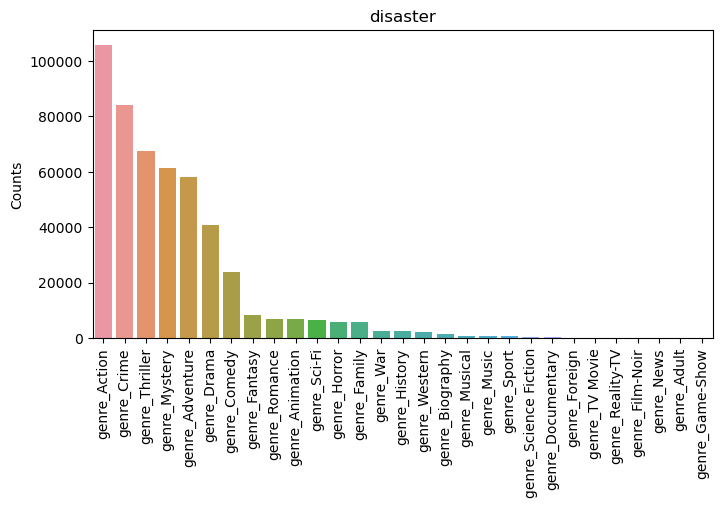

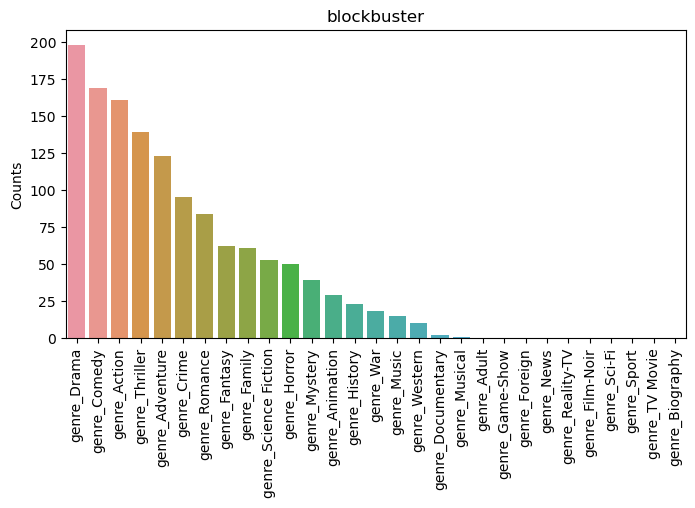

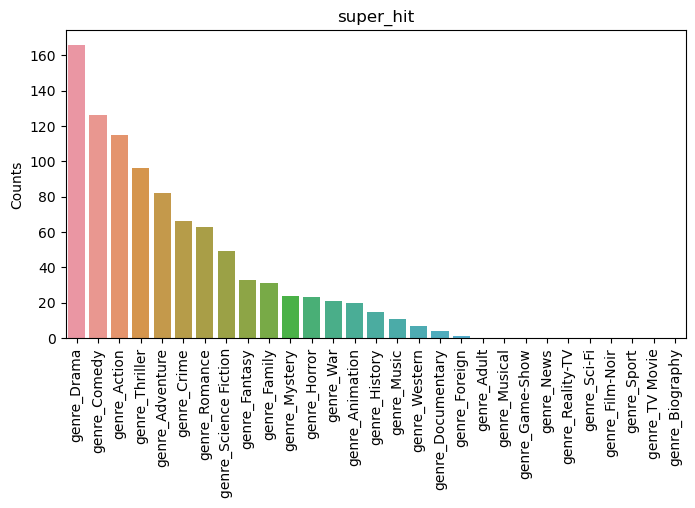

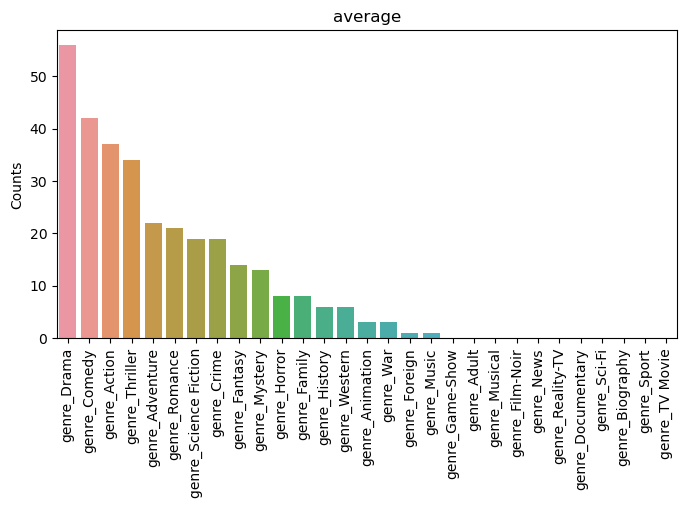

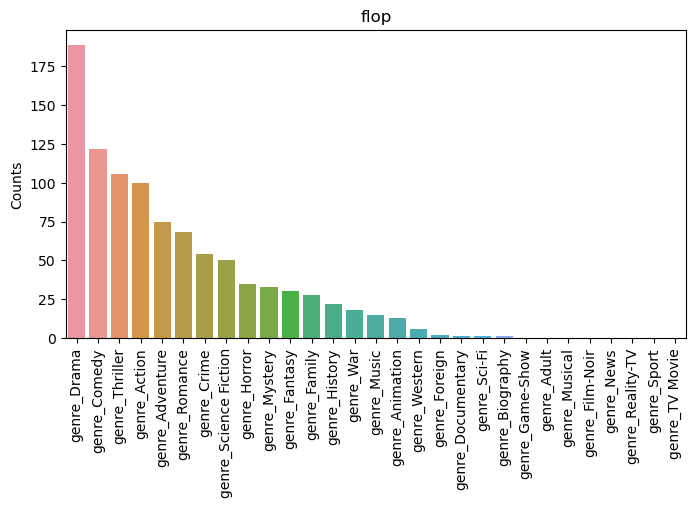

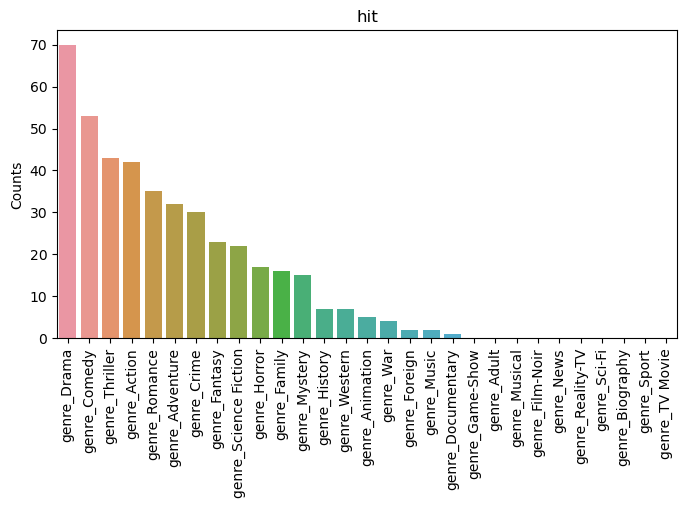

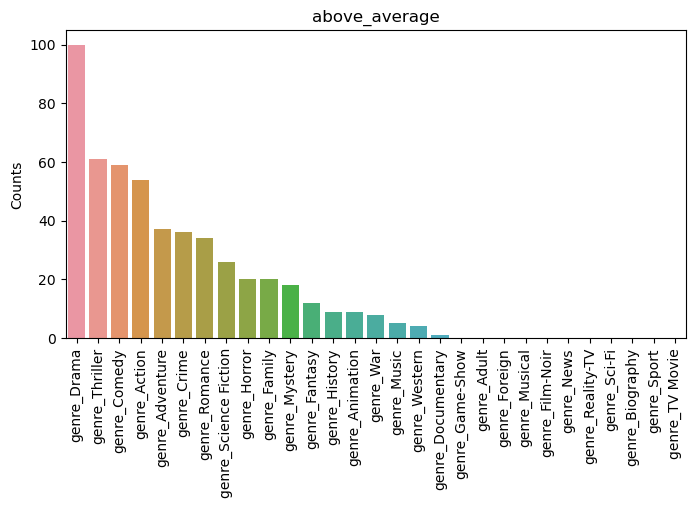

In [50]:
for mv_class in movie_classes:
    plt.figure(figsize=(8, 4))
    genre_dist_for_each_mvclass = genre_distribution.loc[mv_class][genre_columns].sort_values(ascending=False)
    sns.barplot(x = genre_dist_for_each_mvclass.index, y = genre_dist_for_each_mvclass)
    x = plt.xticks(rotation=90)
    plt.ylabel('Counts')
    plt.title(mv_class)

### Genre Distribution for Profit and Non-Profit

In [51]:
profit = df['profit'] > 0
loss = df['profit'] <= 0

Text(0.5, 1.0, 'Genre Distribution for Profitable Movies')

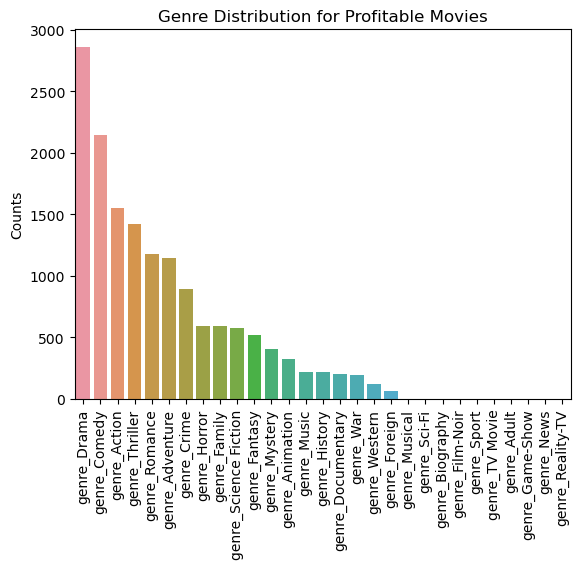

In [52]:
profit_genres = df[profit][genre_columns].sum().sort_values(ascending=False)
sns.barplot(x = profit_genres.index, y = profit_genres)
x = plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title("Genre Distribution for Profitable Movies")

Text(0.5, 1.0, 'Genre Distribution for Non-Profitable Movies')

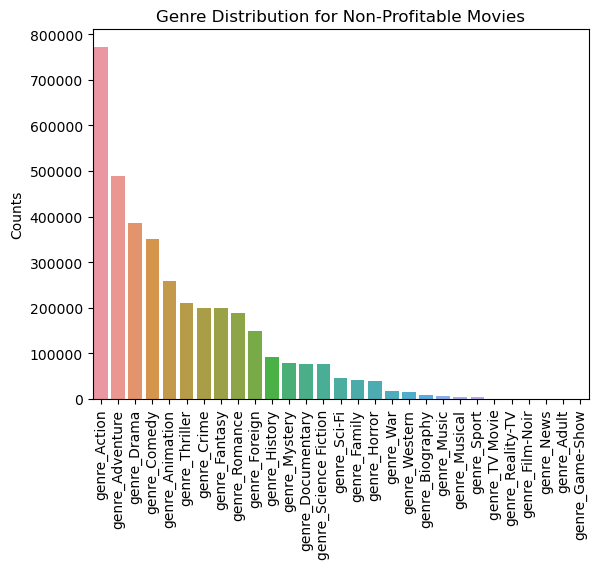

In [53]:
loss_genres = df[loss][genre_columns].sum().sort_values(ascending=False)
sns.barplot(x = loss_genres.index, y = loss_genres)
x = plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title("Genre Distribution for Non-Profitable Movies")

In [54]:
df[loss][genre_columns].sum().sort_values(ascending=False)

genre_Action             771839
genre_Adventure          489191
genre_Drama              386683
genre_Comedy             351443
genre_Animation          258430
genre_Thriller           211403
genre_Crime              198712
genre_Fantasy            198710
genre_Romance            188852
genre_Foreign            149759
genre_History             91518
genre_Mystery             79383
genre_Documentary         77752
genre_Science Fiction     76588
genre_Sci-Fi              47000
genre_Family              40660
genre_Horror              40129
genre_War                 18479
genre_Western             14394
genre_Biography            9585
genre_Music                5568
genre_Musical              5325
genre_Sport                4720
genre_TV Movie              747
genre_Reality-TV            100
genre_Film-Noir              98
genre_News                   37
genre_Adult                  13
genre_Game-Show              13
dtype: int64

### Budget vs Profit

<AxesSubplot:xlabel='budget', ylabel='profit'>

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


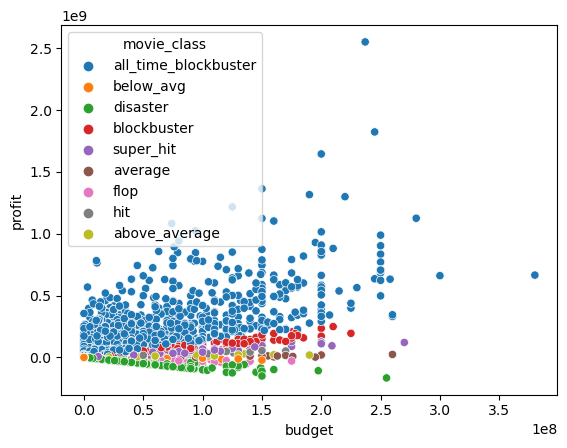

In [55]:
sns.scatterplot(x = df['budget'], y = df['profit'], hue=df['movie_class'])

In [56]:
df['profit_percent'].describe()

count    9.791210e+05
mean     2.416832e+11
std      1.215785e+13
min     -1.000000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.552983e+15
Name: profit_percent, dtype: float64

### Budget vs Success

In [57]:
df[['movie_class', 'budget_class', 'budget']].groupby(['movie_class', 'budget_class'], as_index=False).count()

movie_class budget_class  budget
0          above_average         high      52
1          above_average          low      20
2          above_average          mid     112
3   all_time_blockbuster         high     603
4   all_time_blockbuster          low    2730
5   all_time_blockbuster          mid    1257
6                average         high      35
7                average          low      19
8                average          mid      64
9              below_avg         high      46
10             below_avg          low  834393
11             below_avg          mid     116
12           blockbuster         high     165
13           blockbuster          low      63
14           blockbuster          mid     234
15              disaster         high     231
16              disaster          low  136206
17              disaster          mid    1949
18                  flop         high      78
19                  flop          low      49
20                  flop          mid     214
21                   hit         high      36
22                   hit          low      32
23                   hit          mid      83
24             super_hit         high     108
25             super_hit          low      48
26             super_hit          mid     178

### Movie Length vs Success

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime', ylabel='profit'>

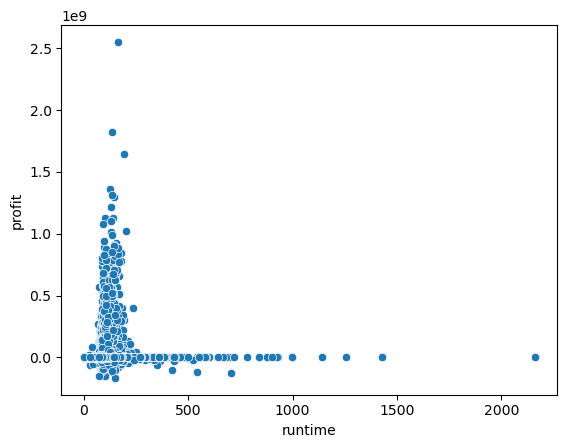

In [58]:
sns.scatterplot(df['runtime'], df['profit'])

Text(0.5, 1.0, 'For All Genres')

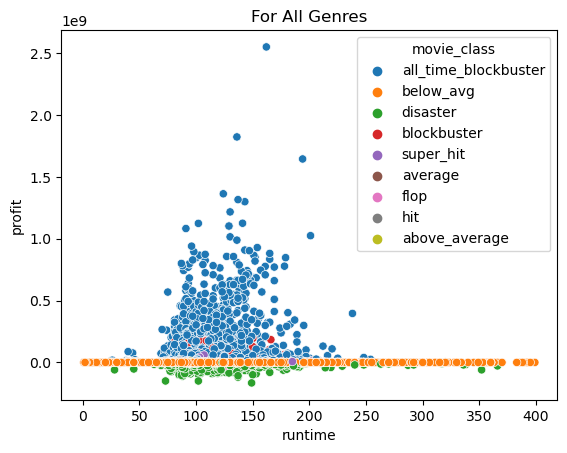

In [59]:
below_500_min = df['runtime'] < 400
# df[below_500_min]['runtime']
sns.scatterplot(x=df[below_500_min]['runtime'], y=df[below_500_min]['profit'], hue=df[below_500_min]['movie_class'])
plt.title("For All Genres")

In [60]:
len(genre_columns)

29

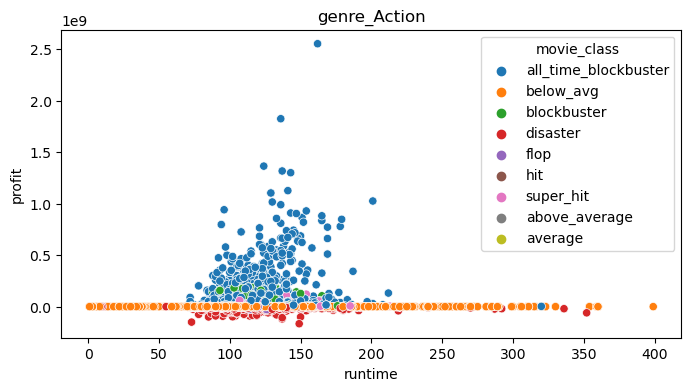

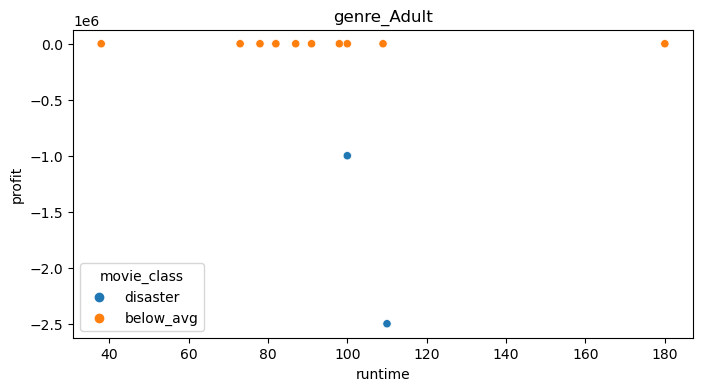

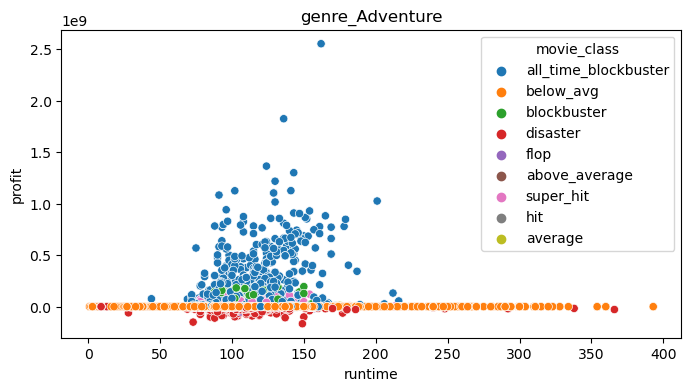

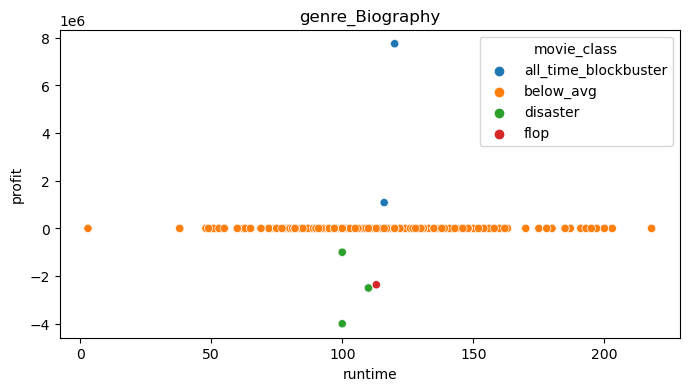

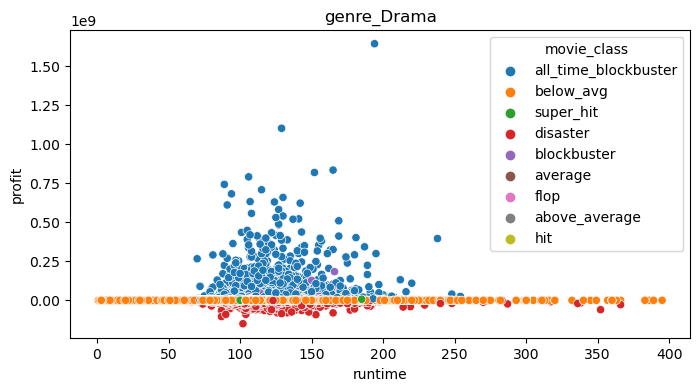

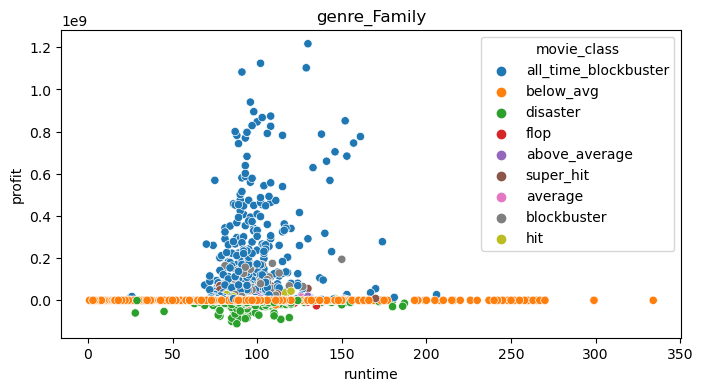

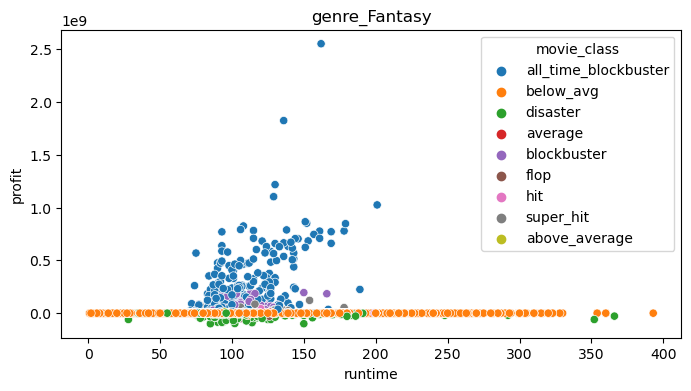

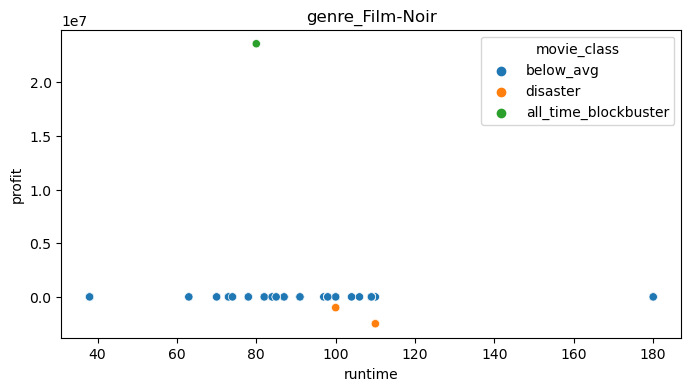

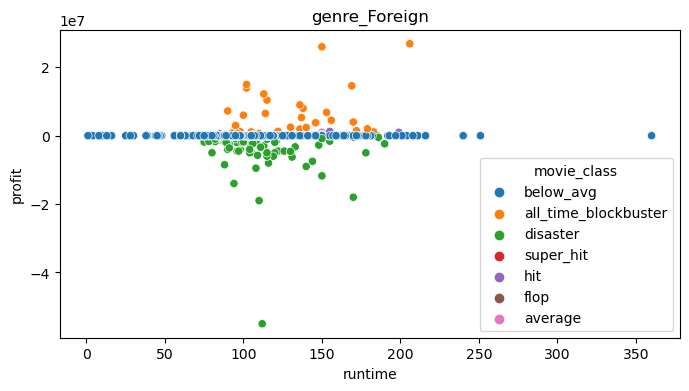

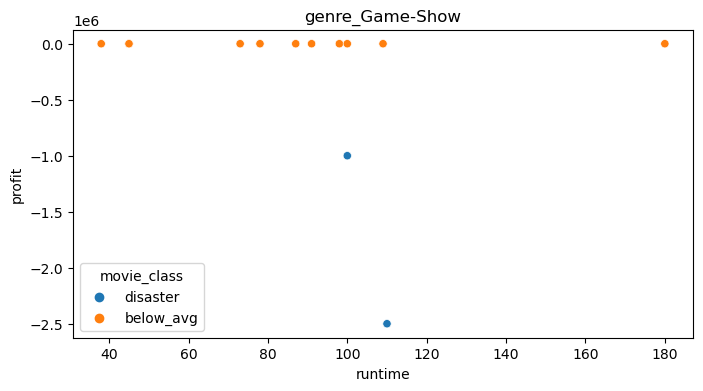

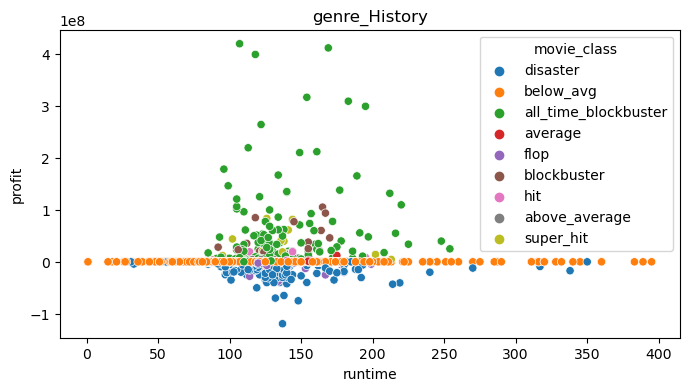

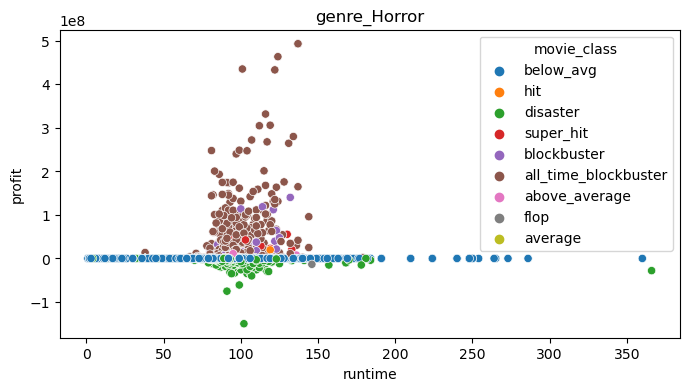

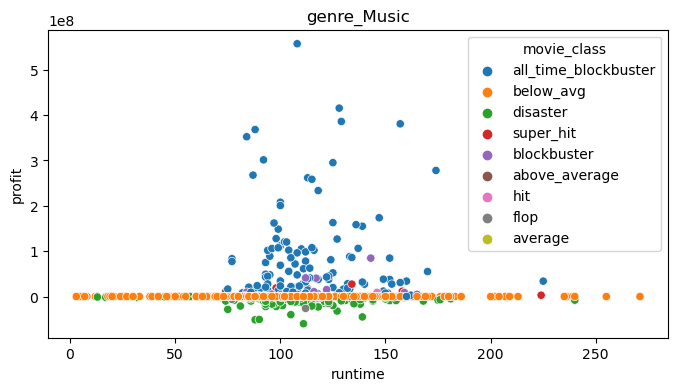

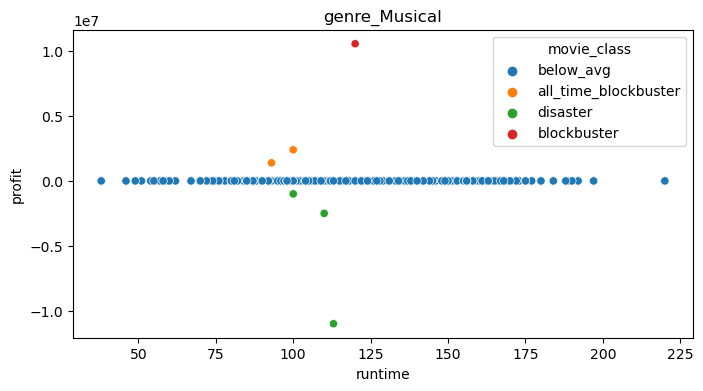

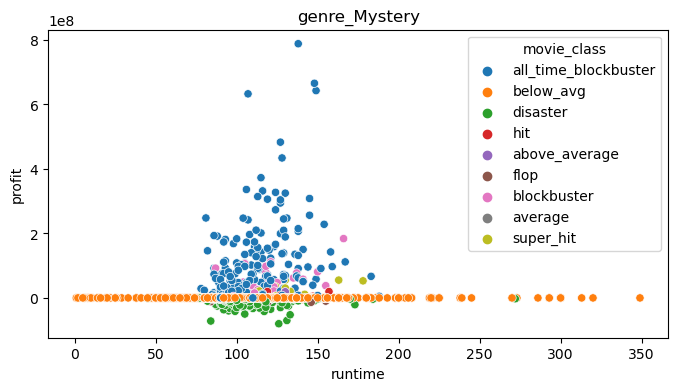

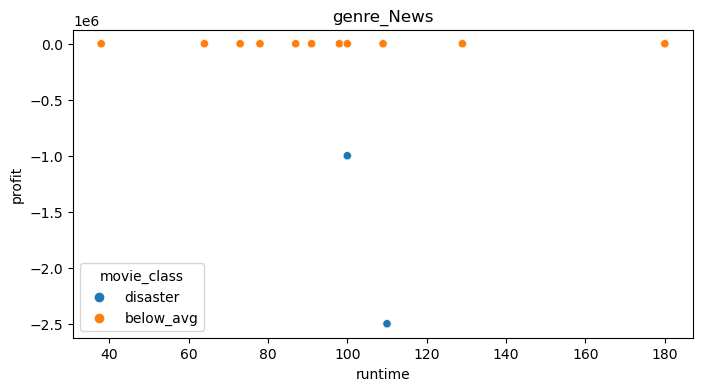

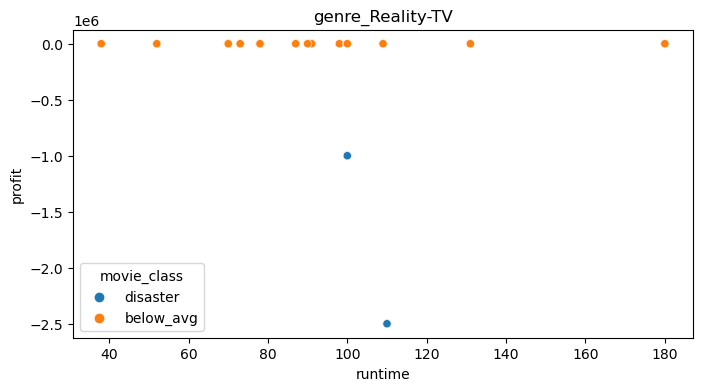

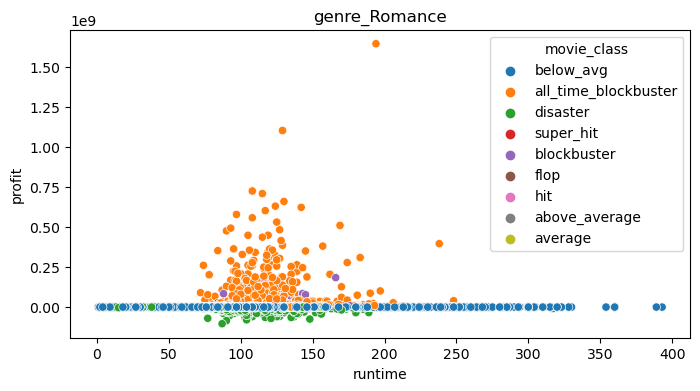

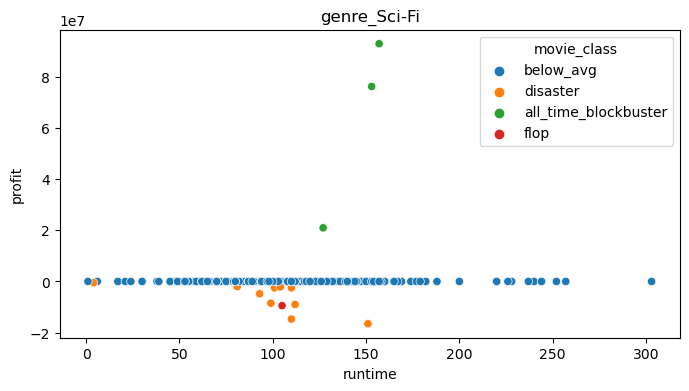

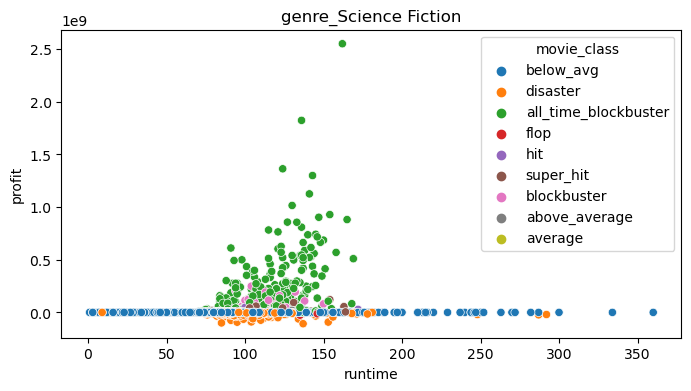

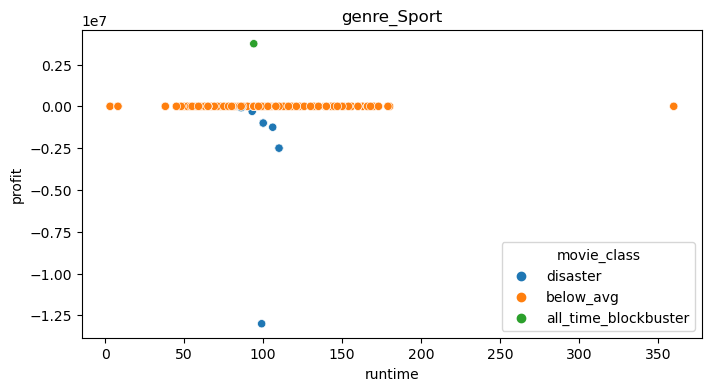

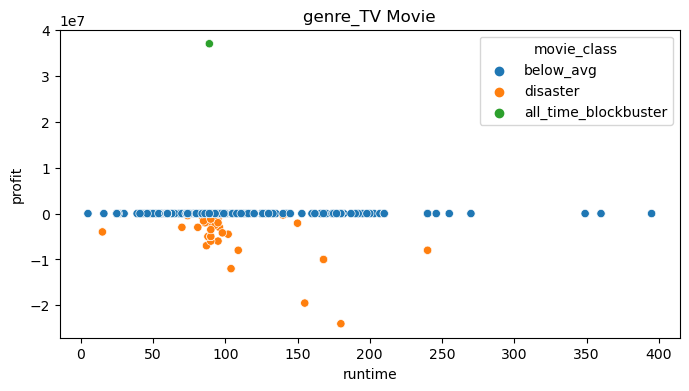

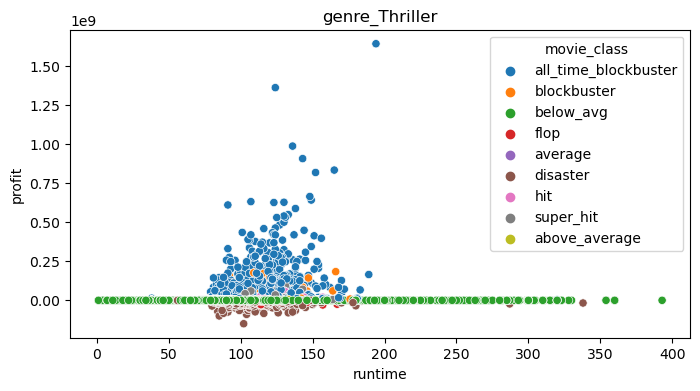

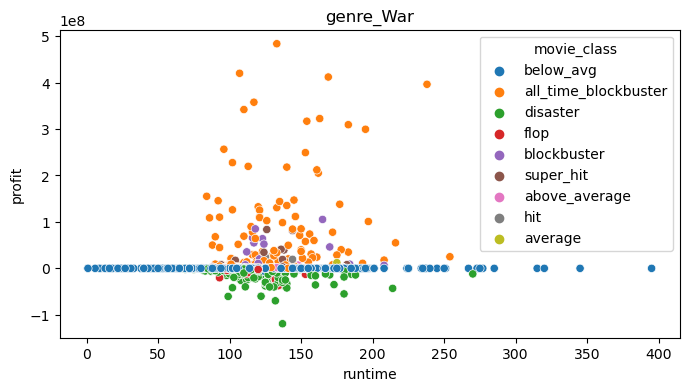

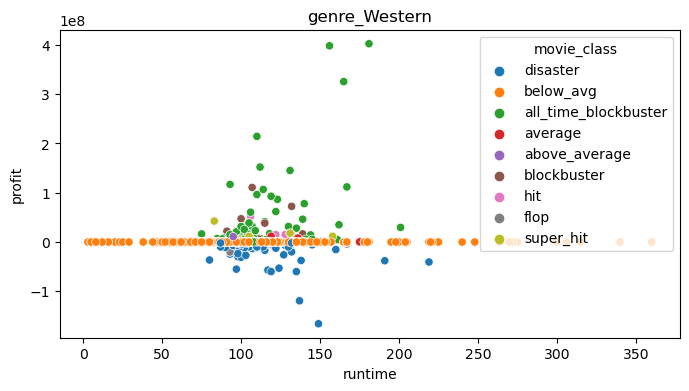

In [61]:

for genre in genre_columns:
    below_500_min = df['runtime'] < 400
    genre_filter = df[genre] == 1
    filter1 = np.logical_and(below_500_min, genre_filter)

    # df[below_500_min]['runtime']
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x = df[filter1]['runtime'], y = df[filter1]['profit'], hue=df[filter1]['movie_class'])
    plt.title(genre)
    plt.show()

## Movie class distribution for each year.

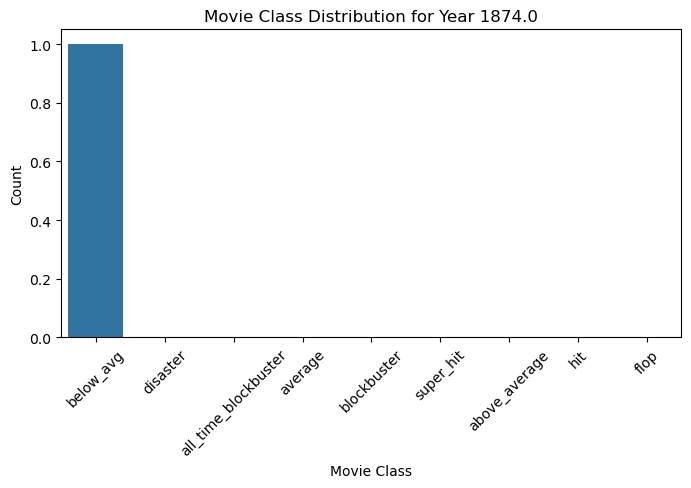

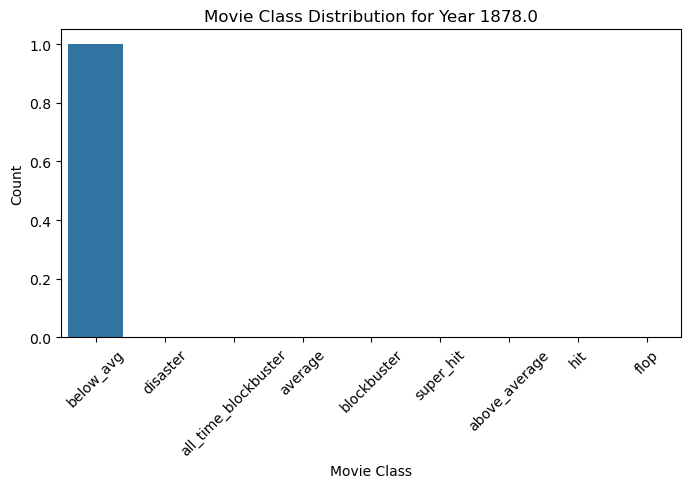

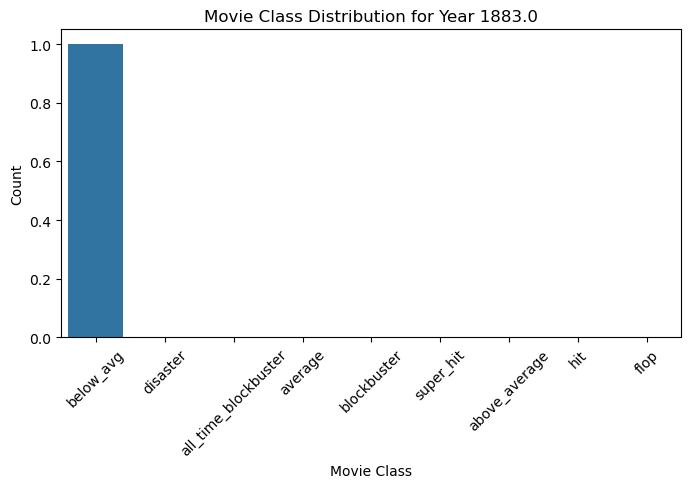

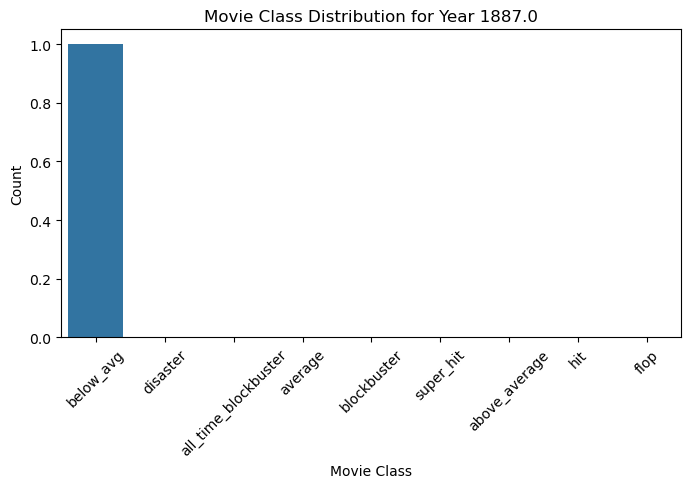

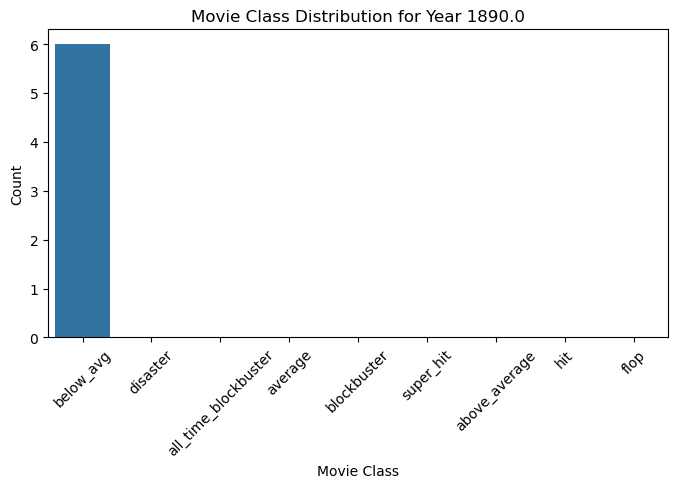

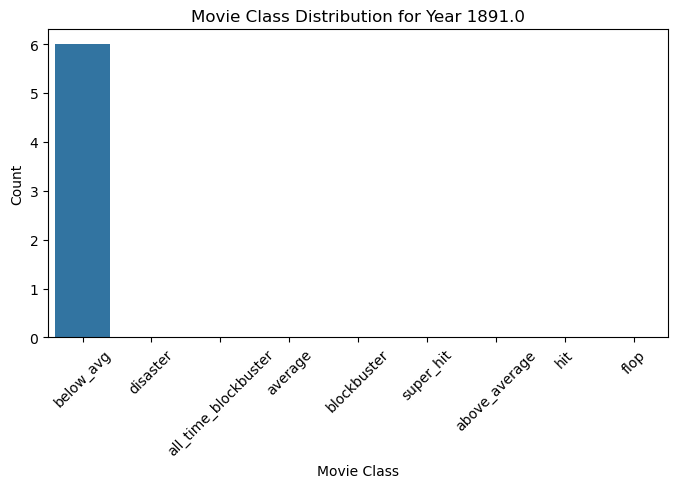

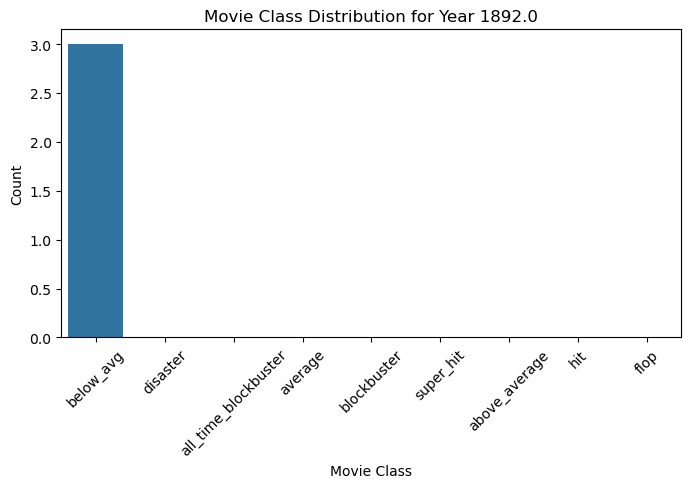

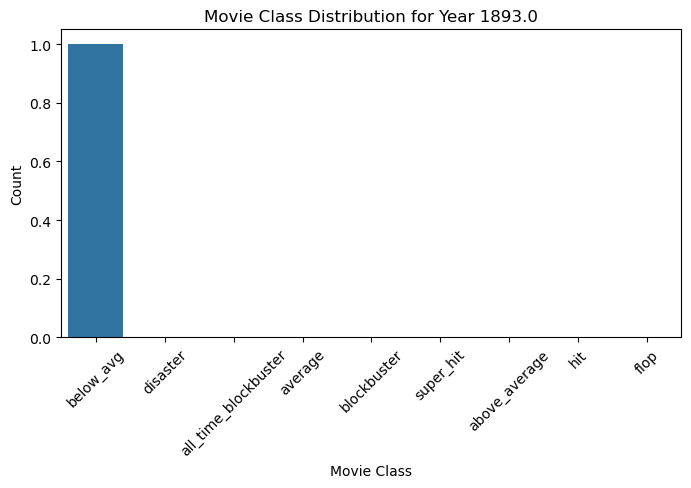

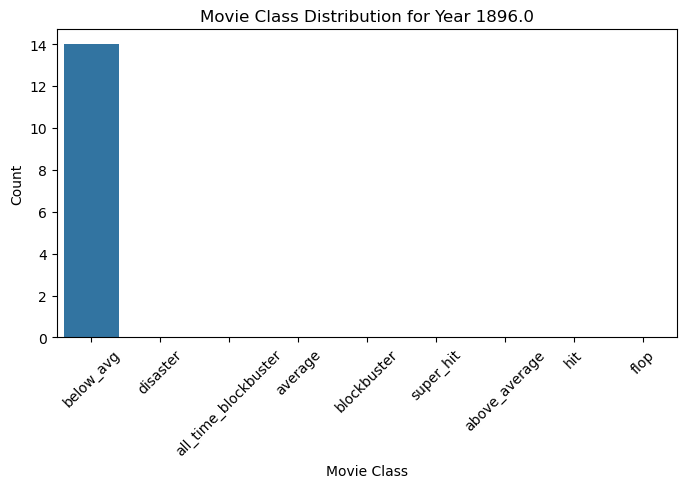

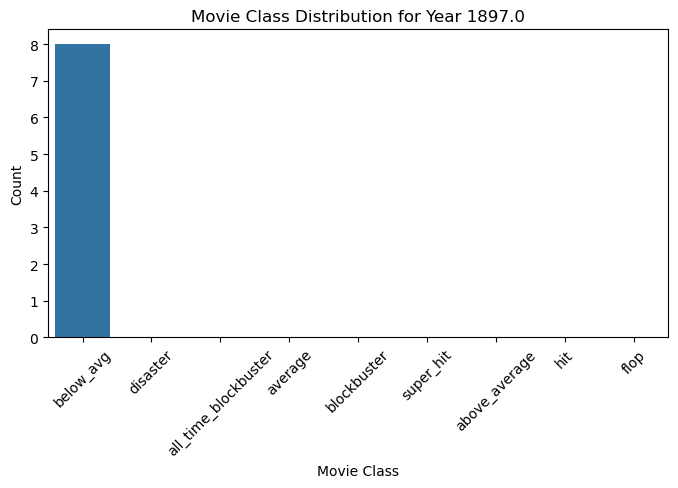

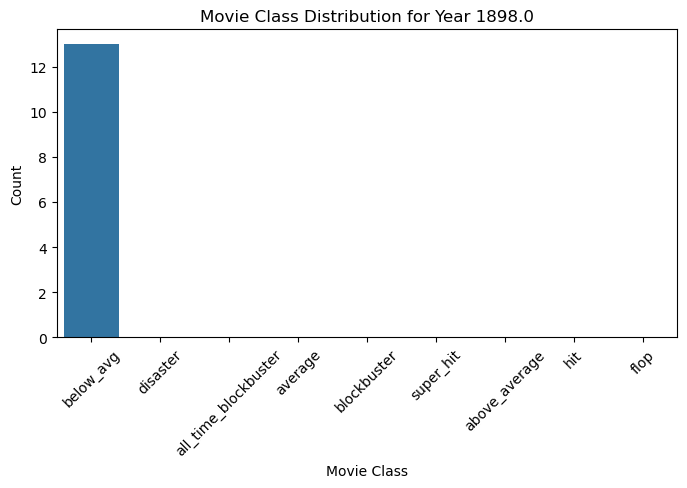

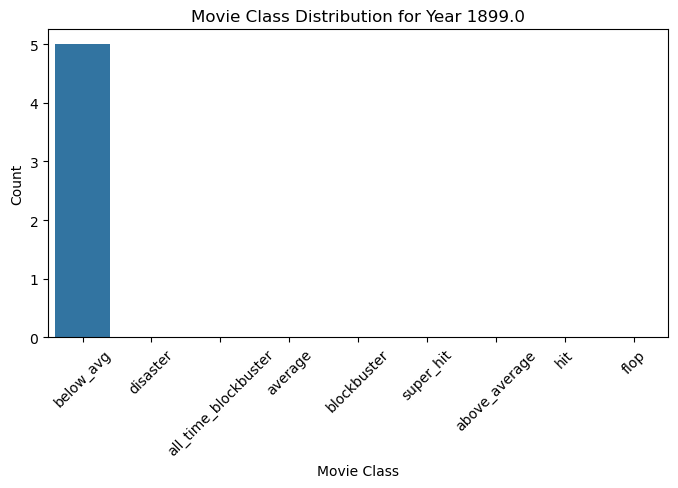

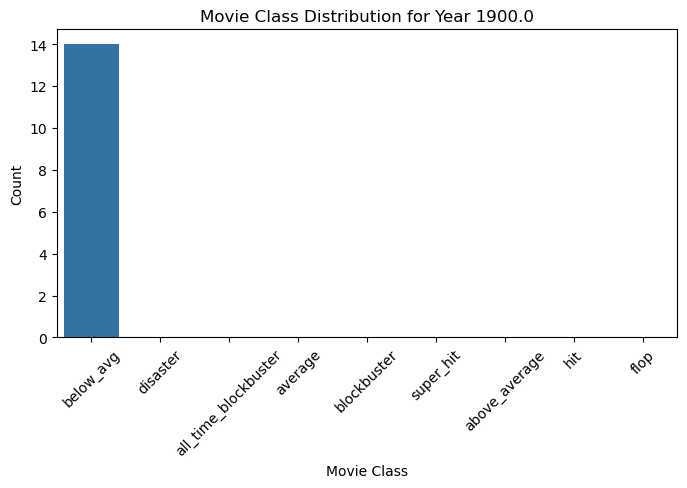

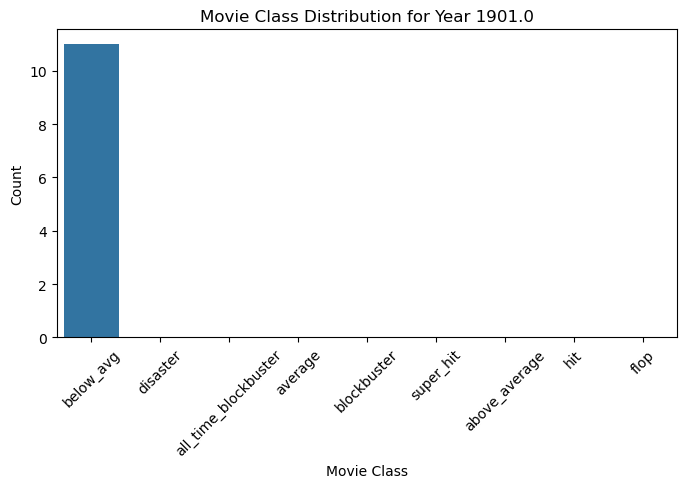

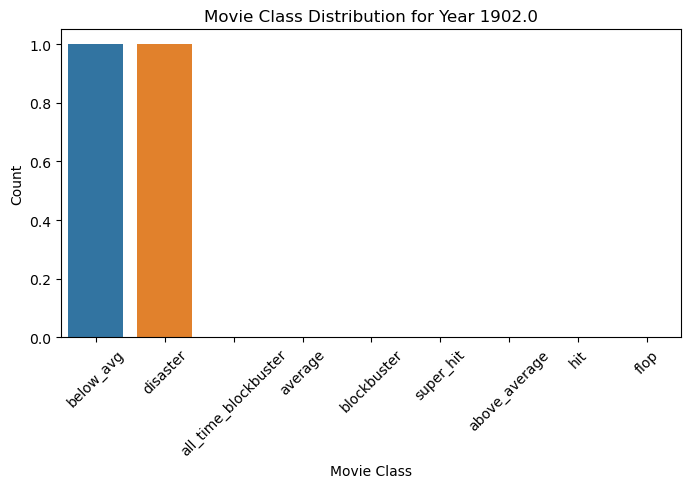

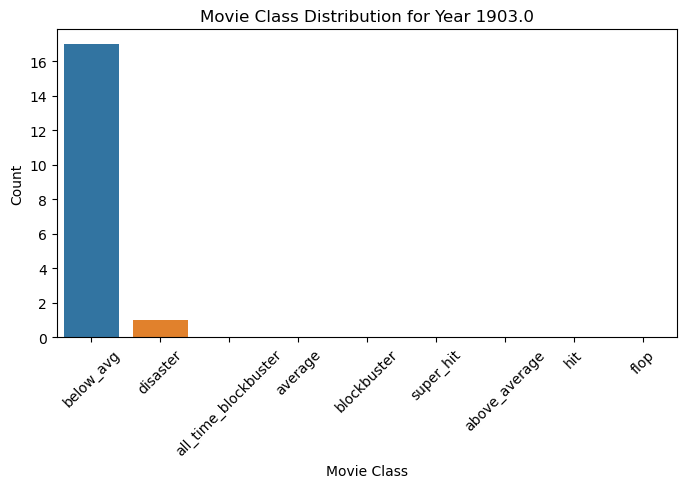

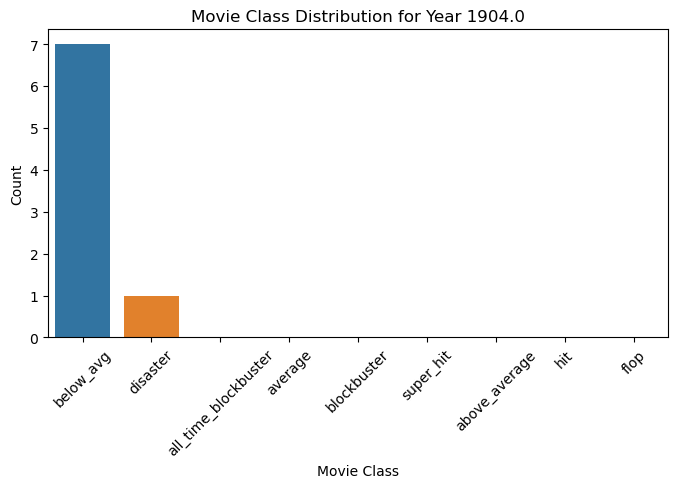

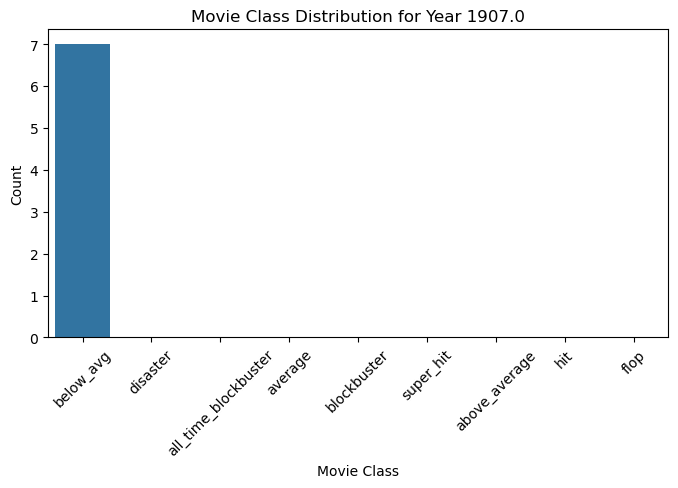

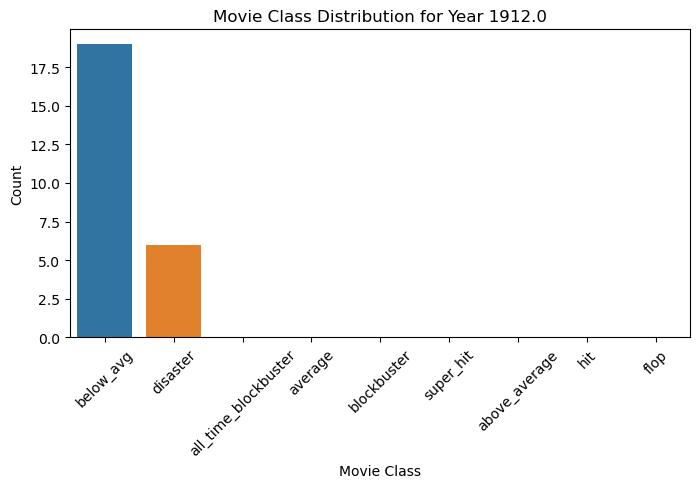

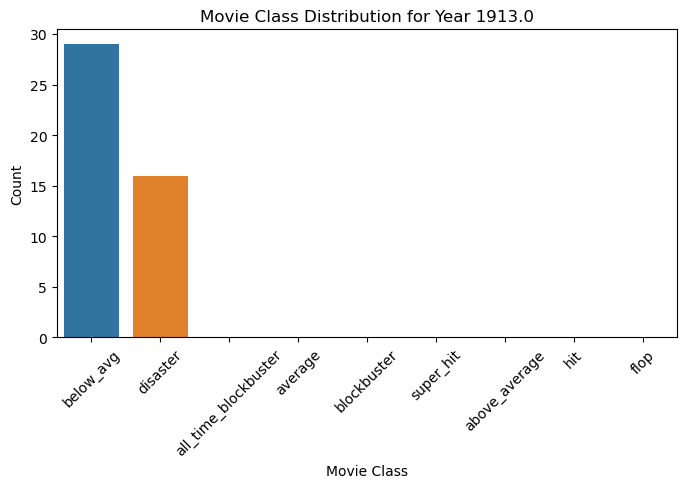

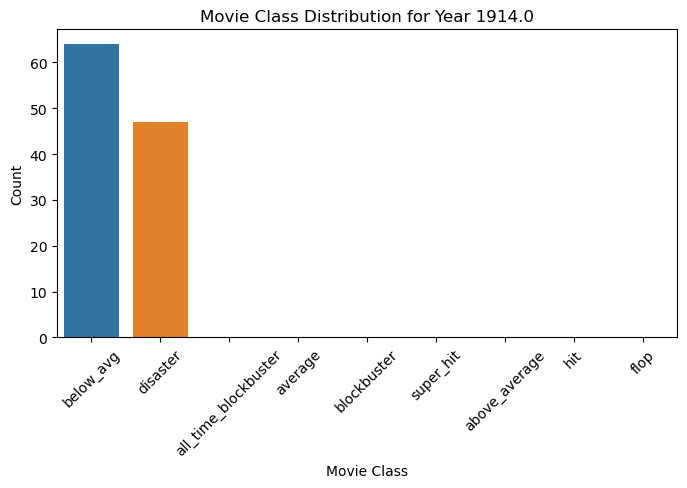

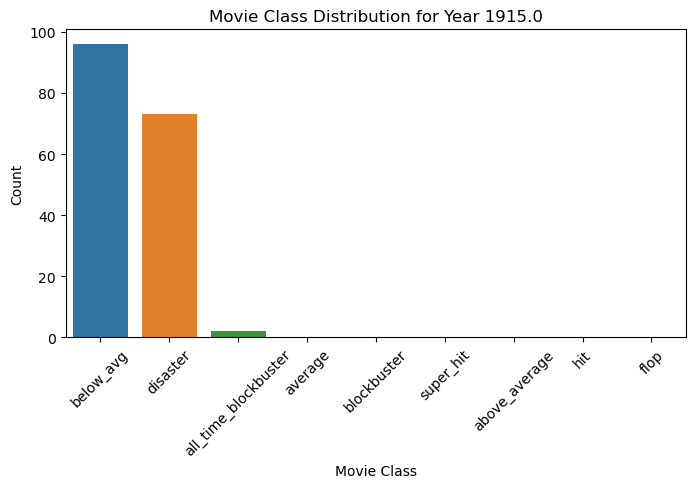

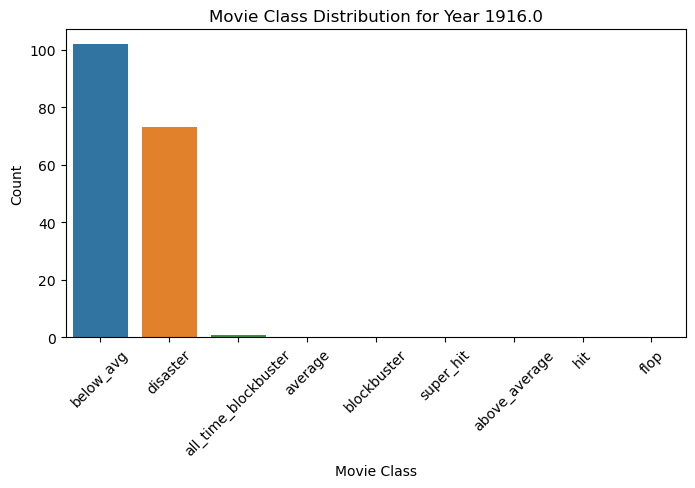

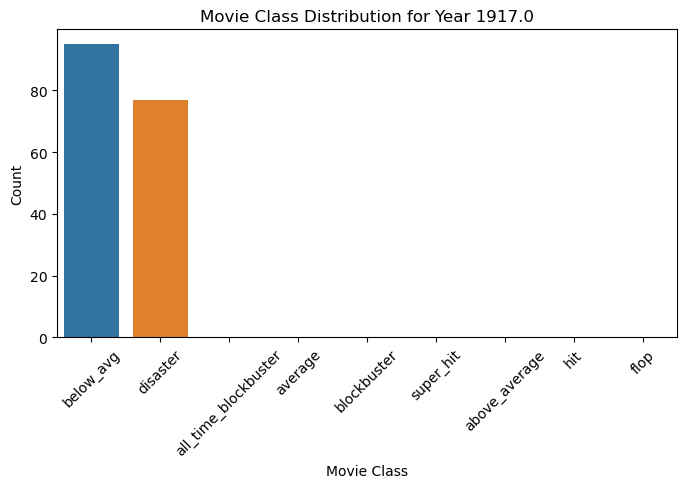

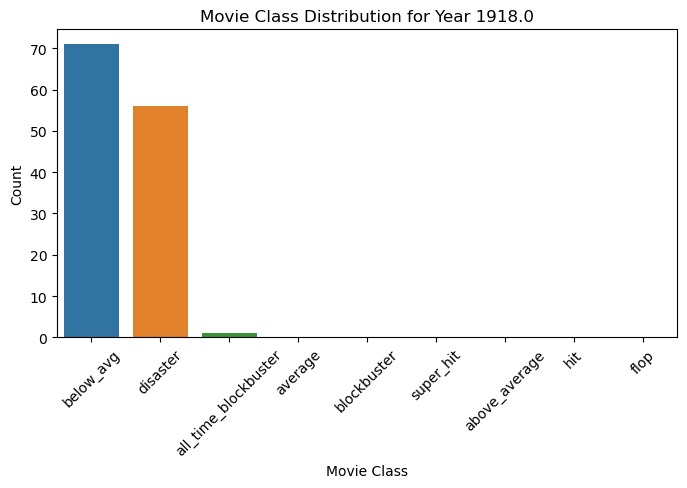

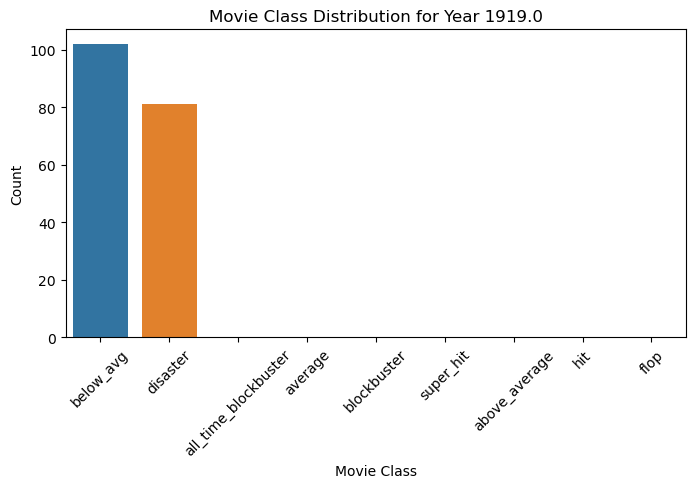

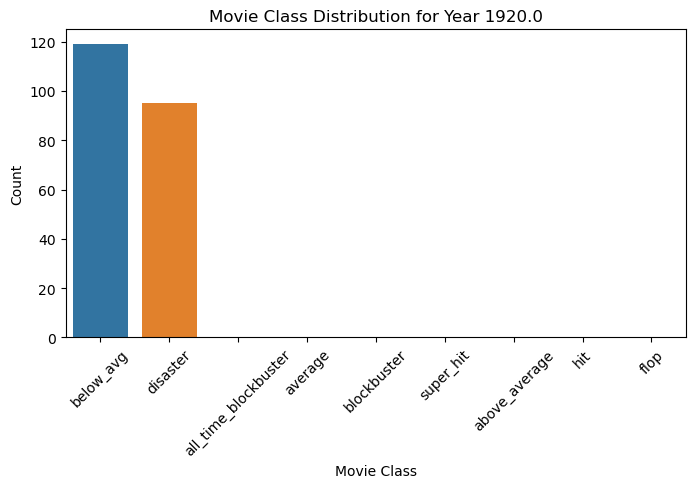

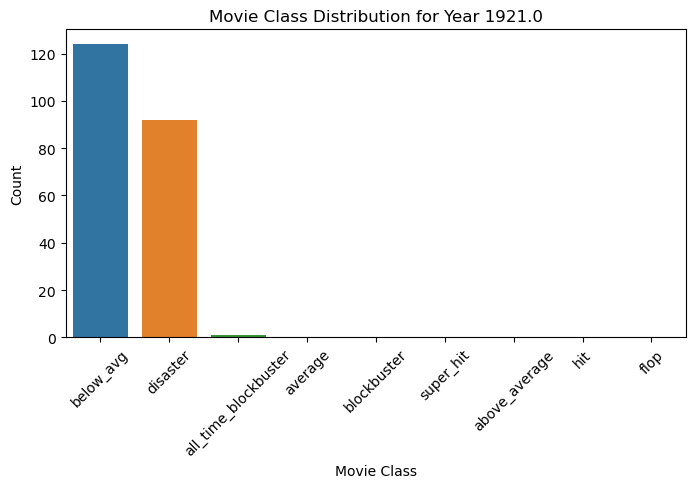

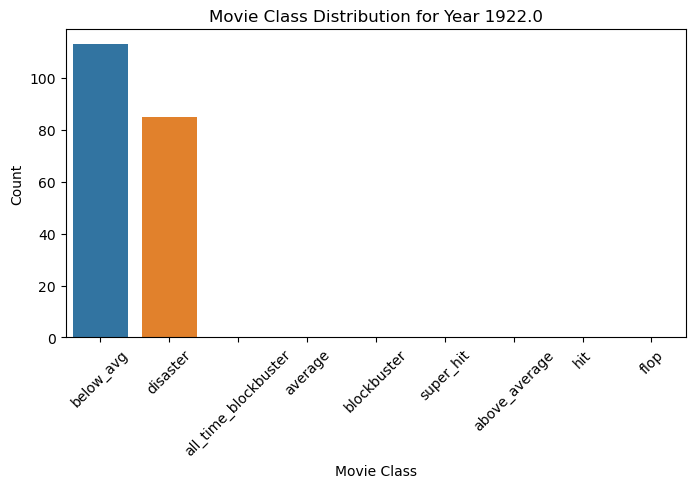

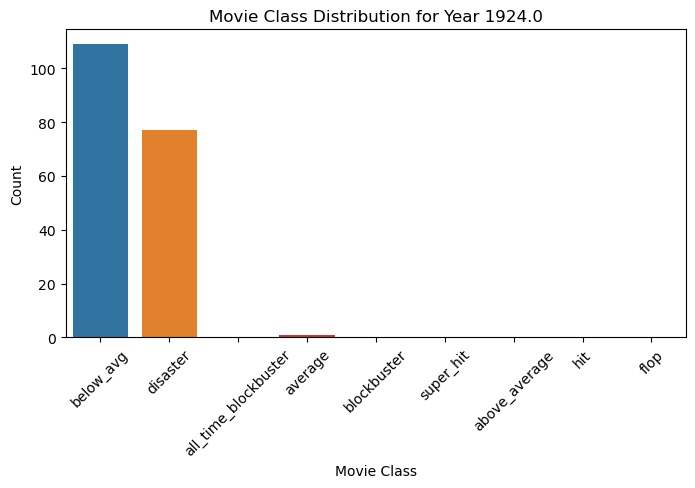

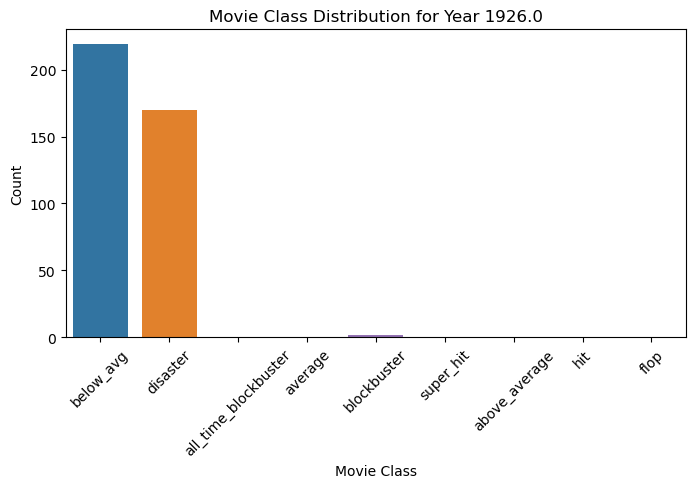

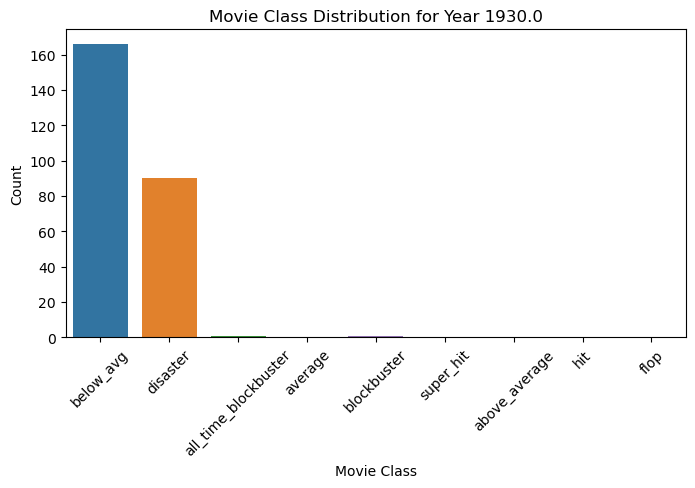

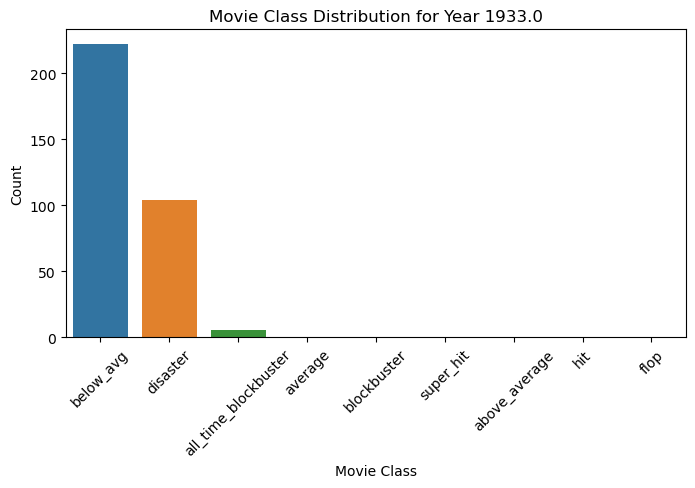

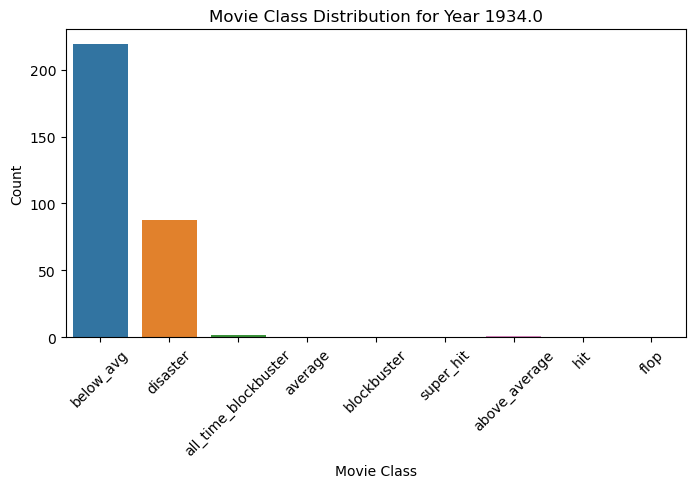

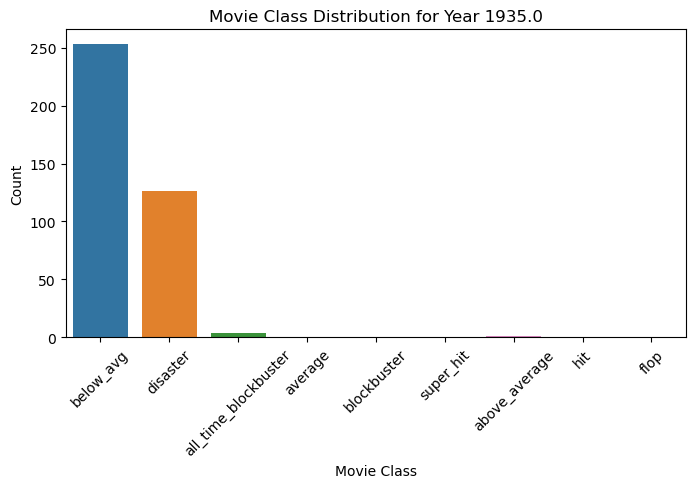

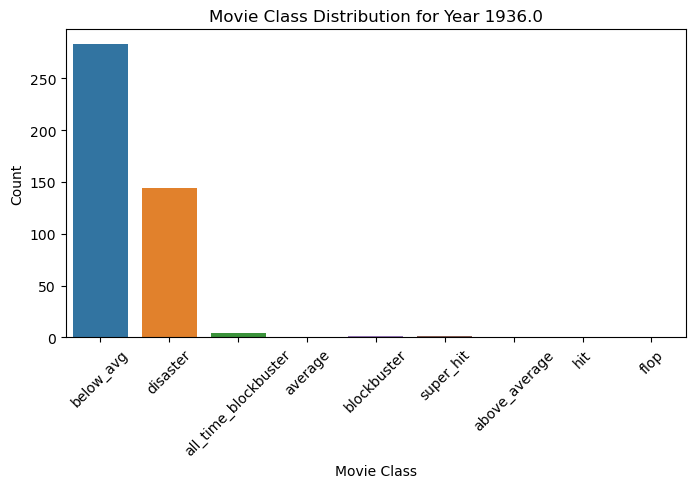

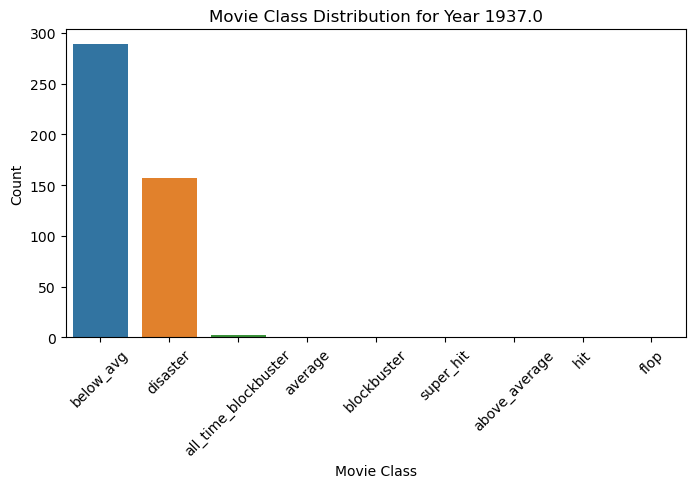

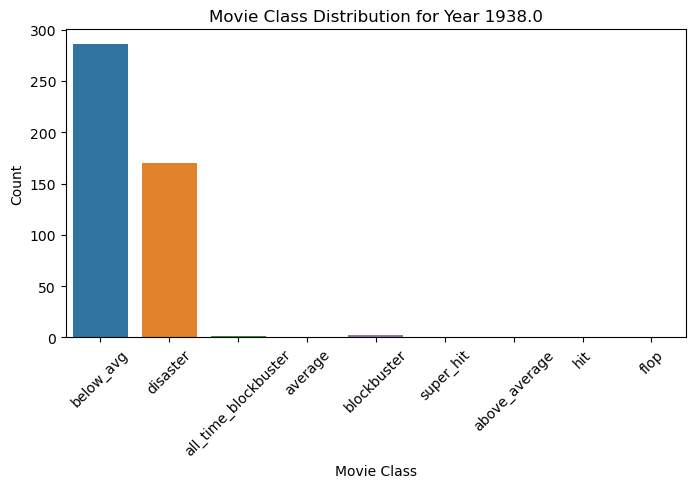

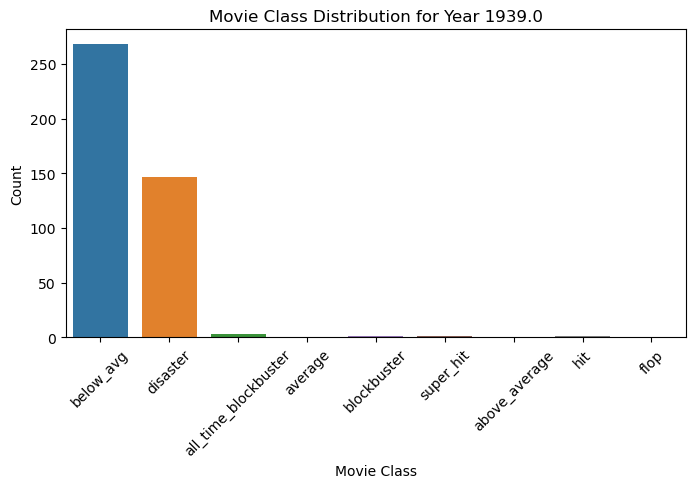

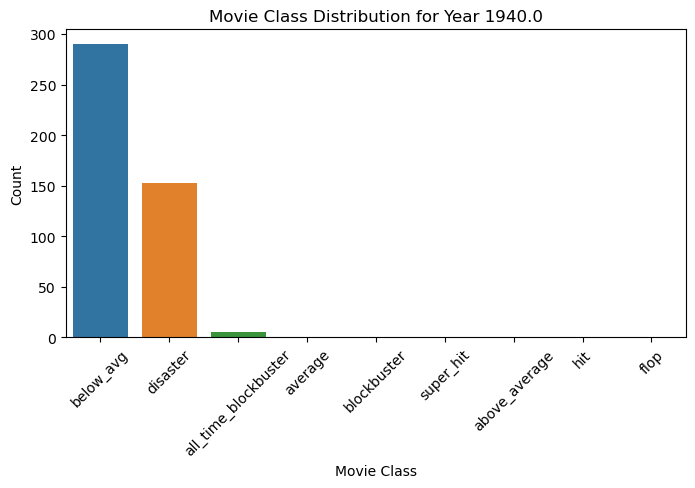

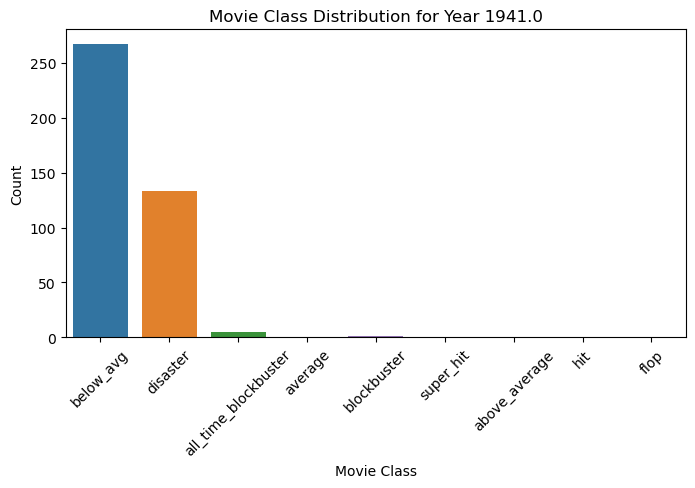

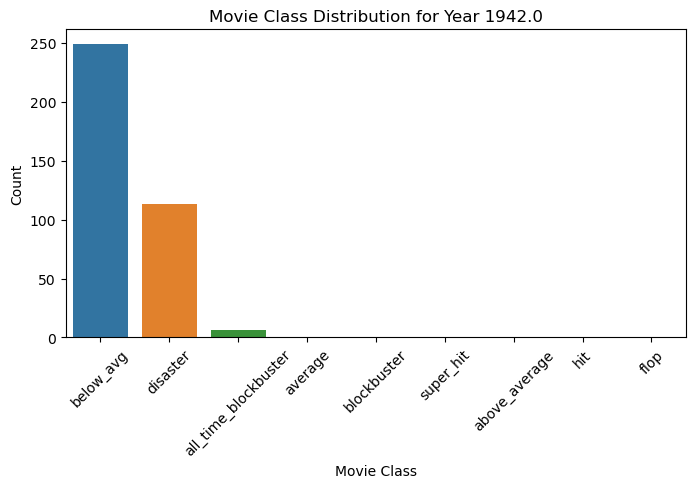

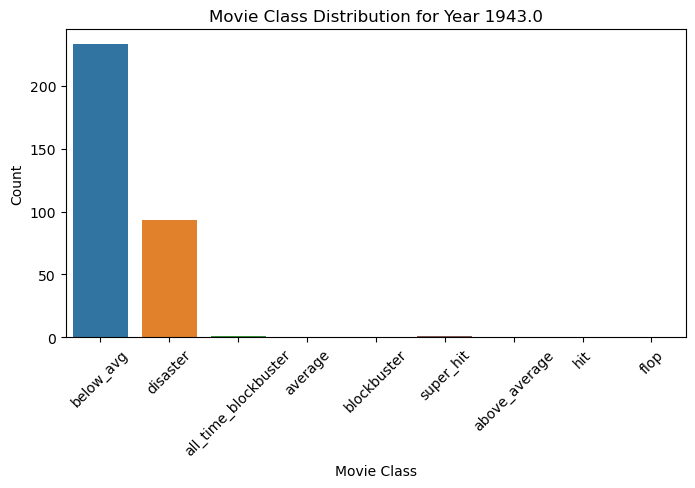

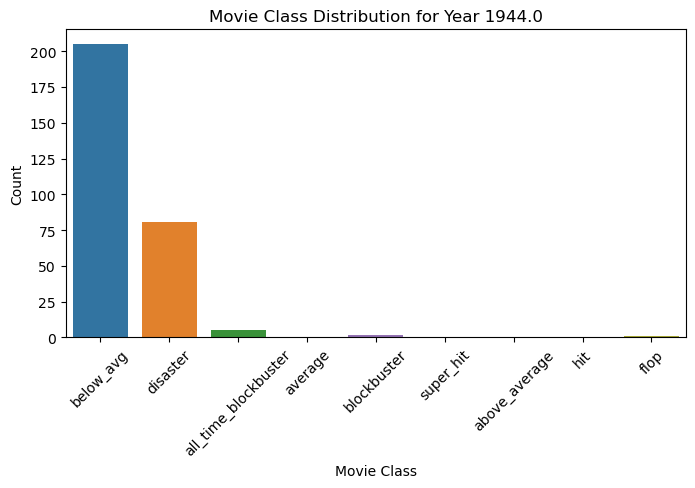

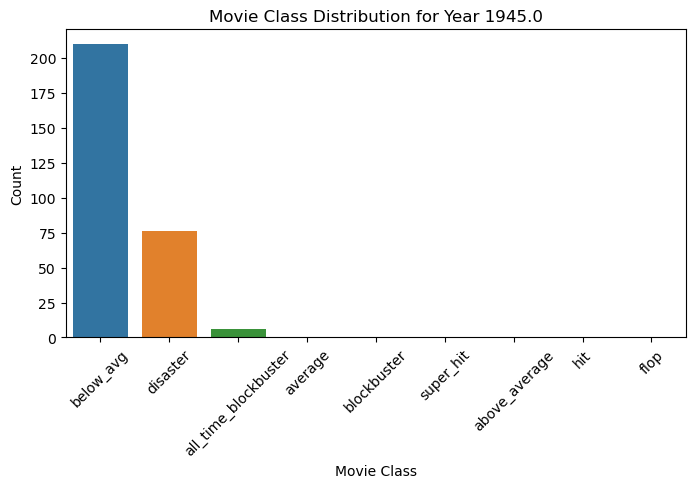

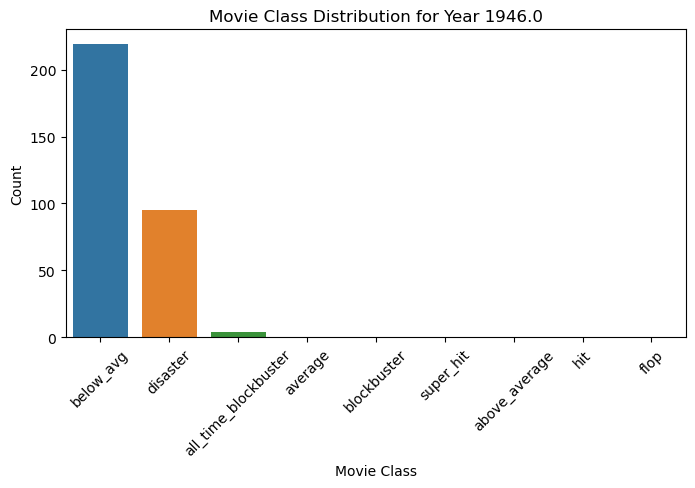

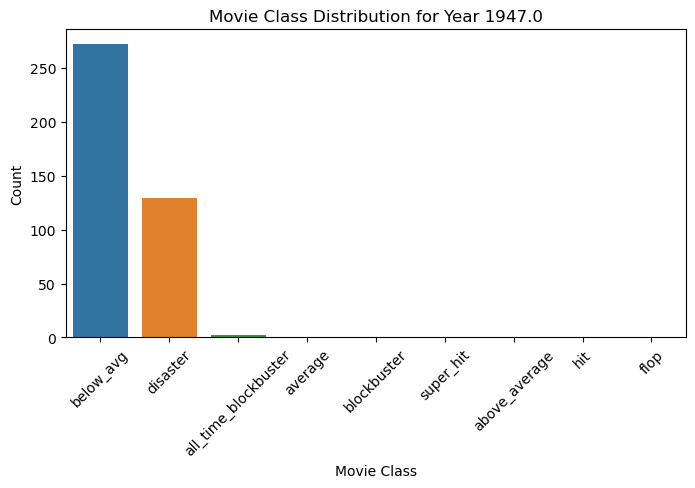

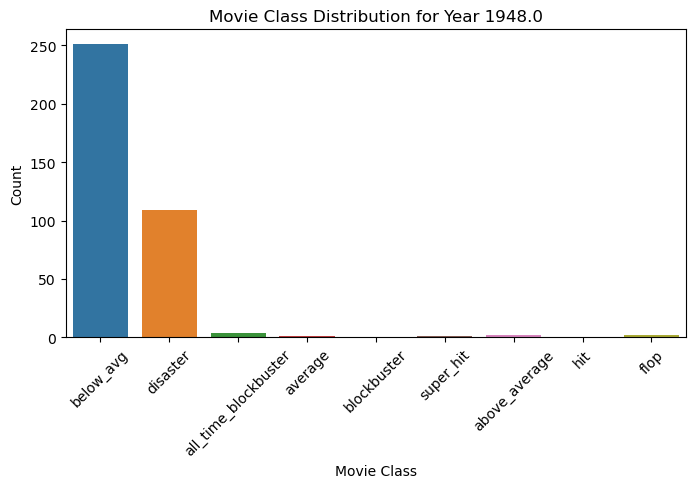

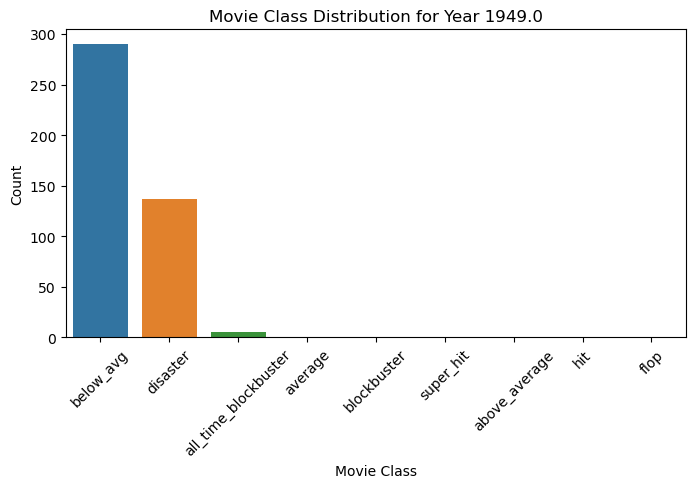

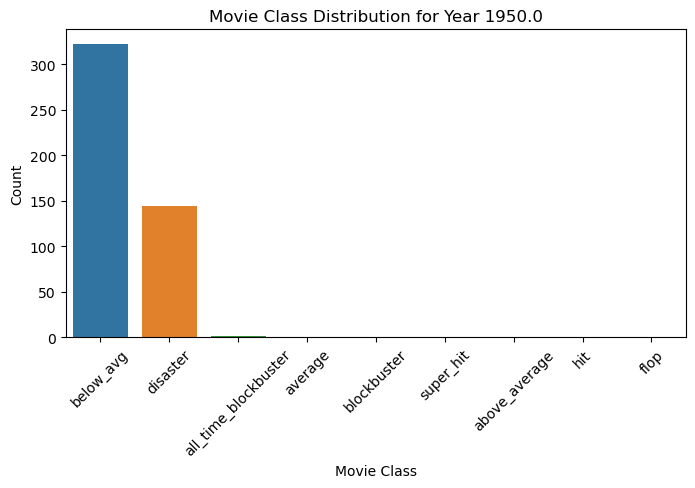

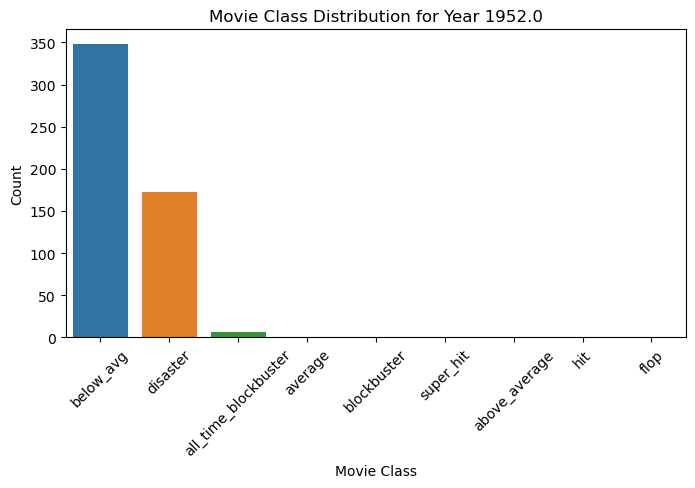

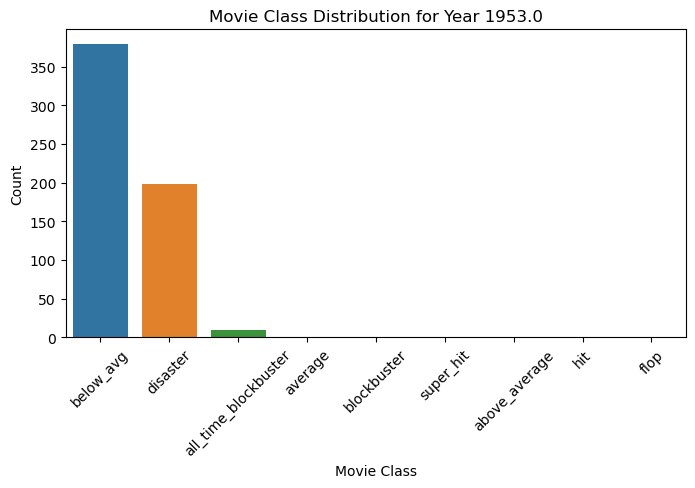

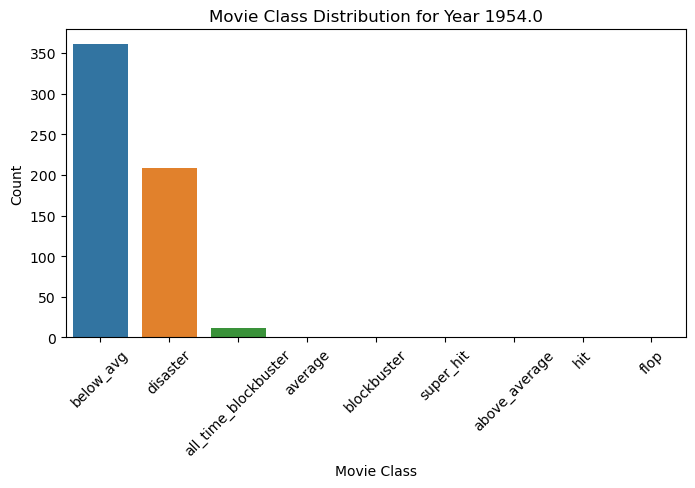

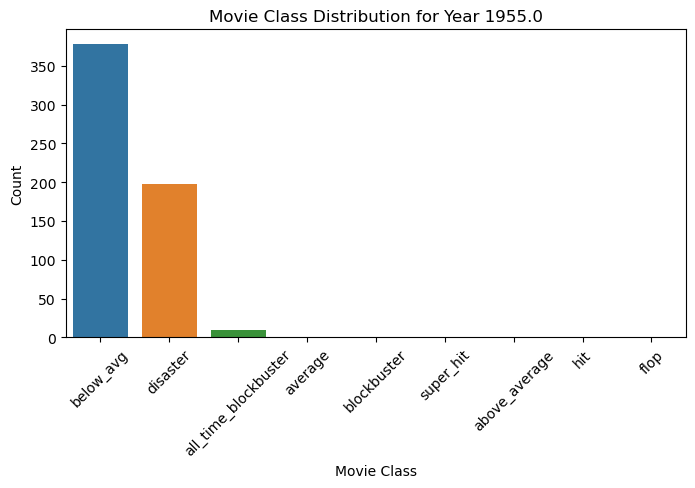

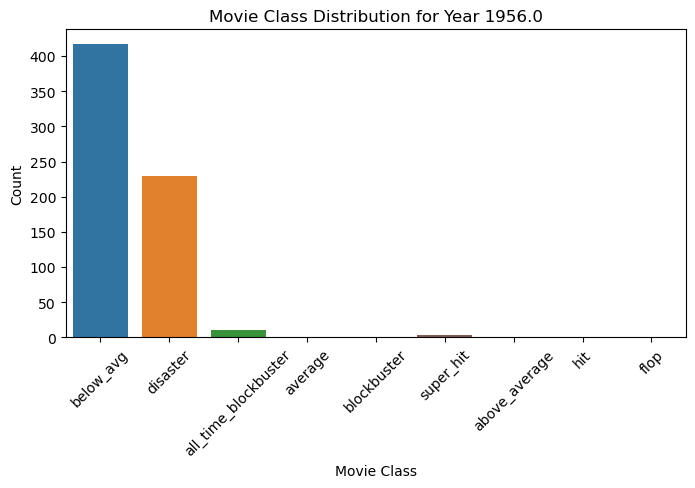

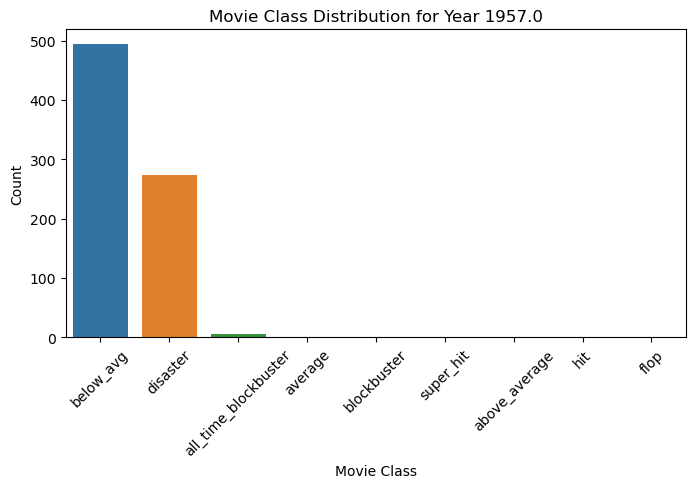

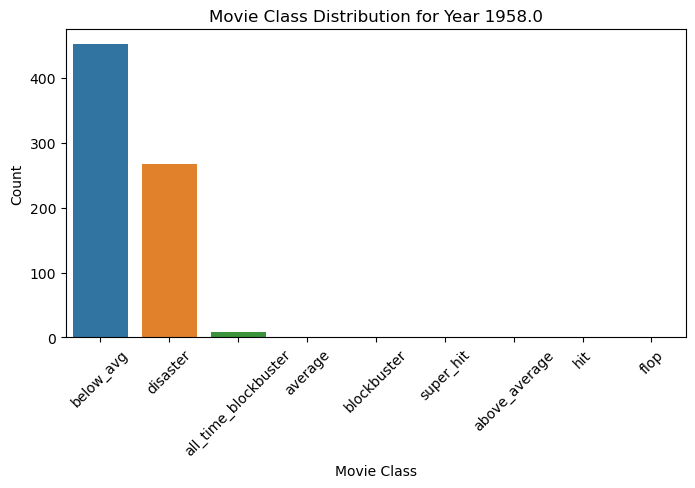

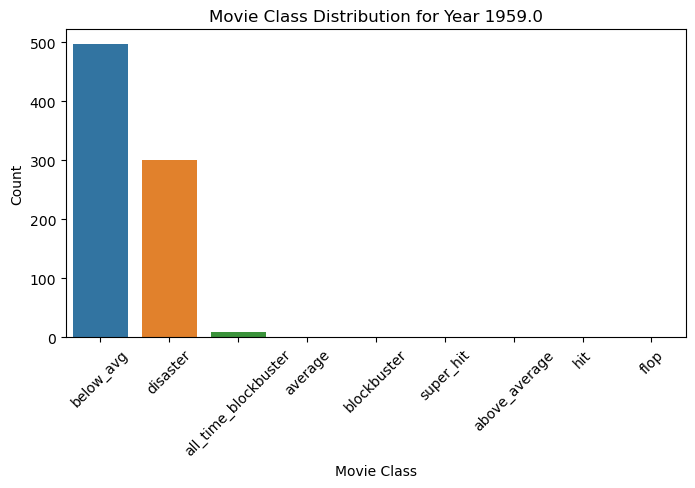

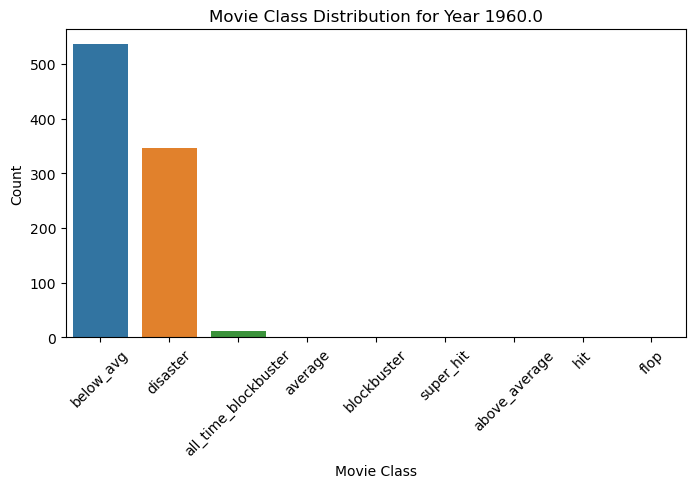

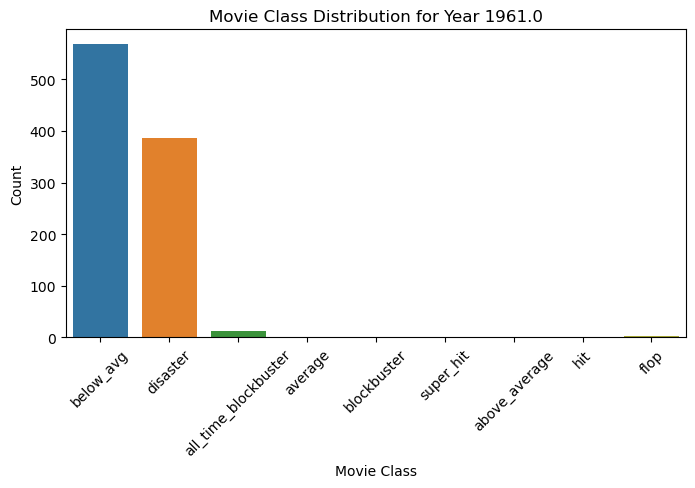

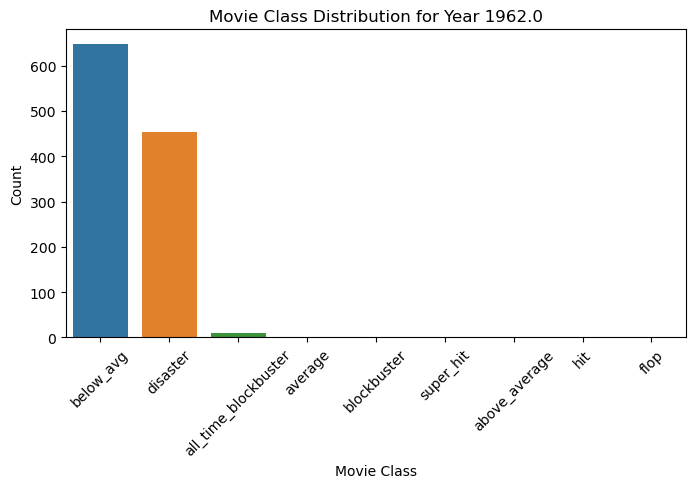

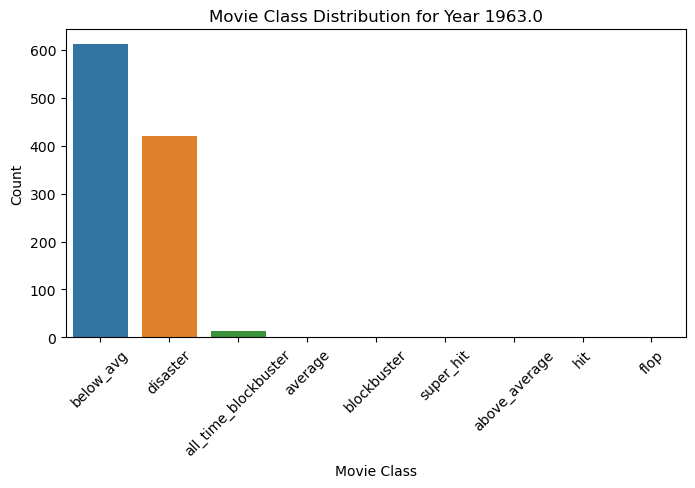

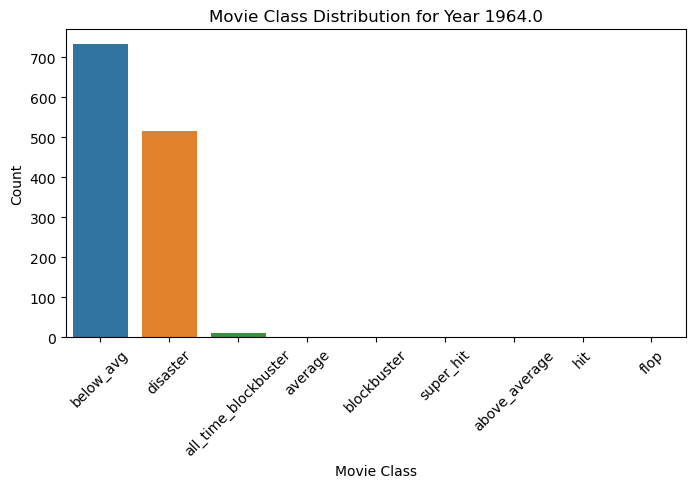

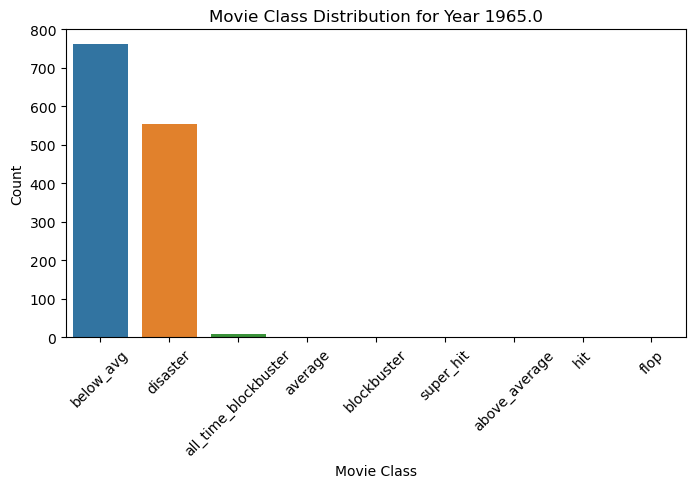

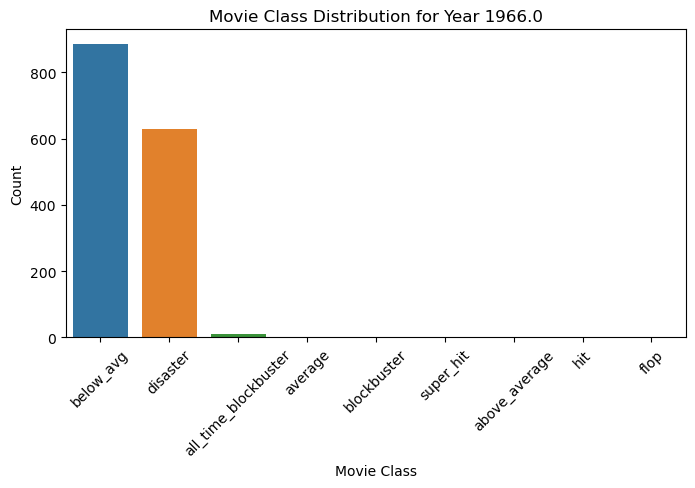

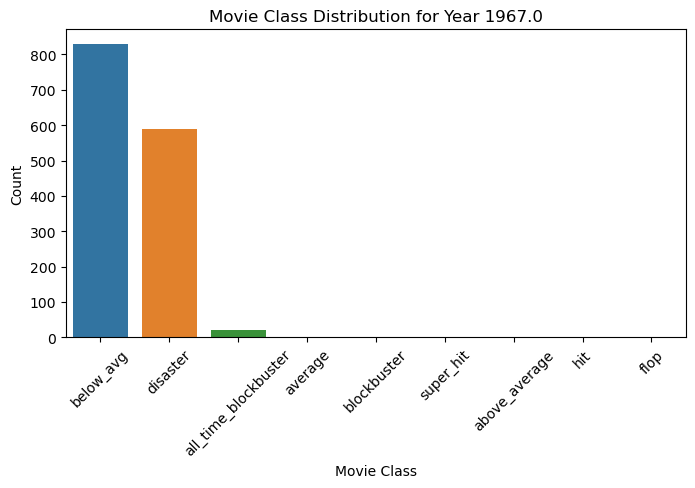

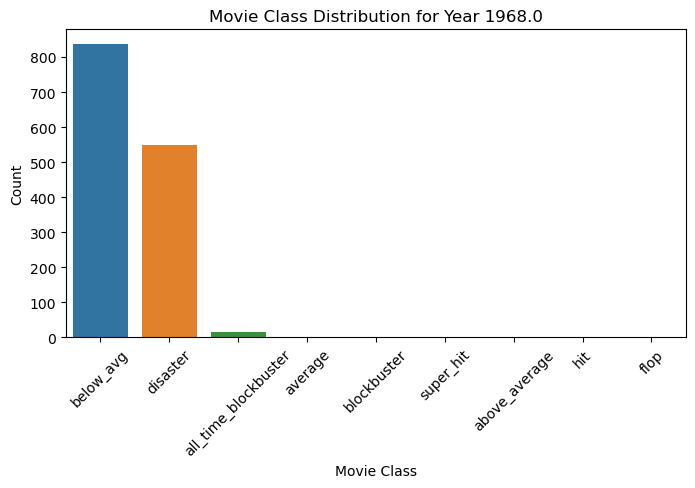

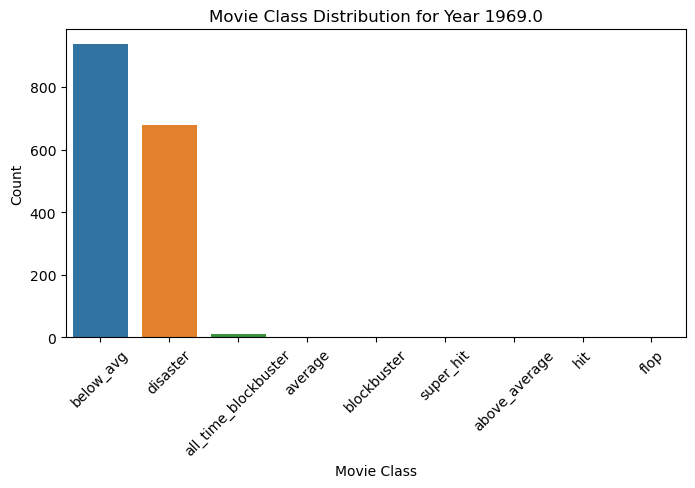

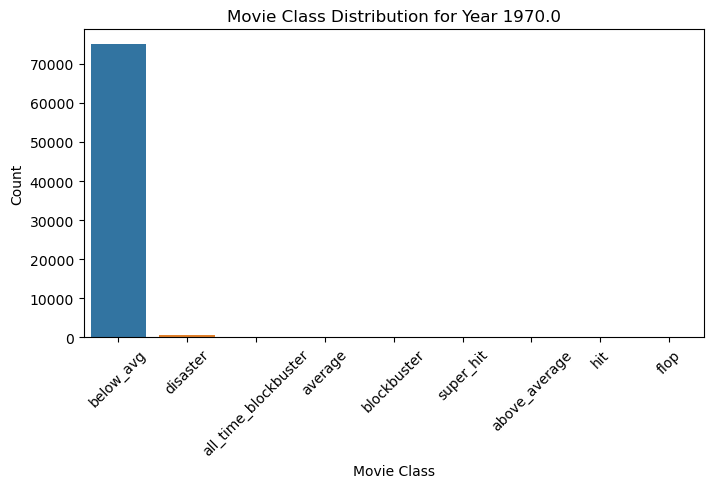

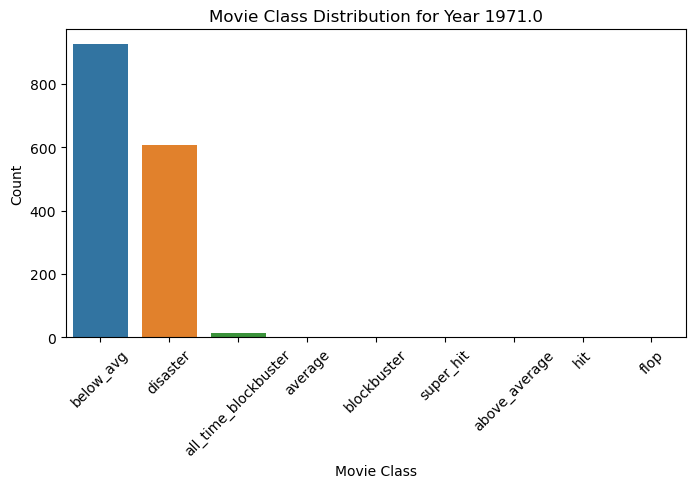

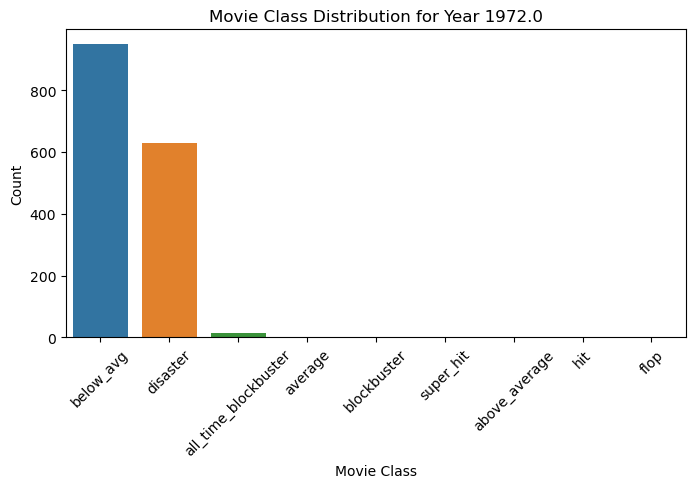

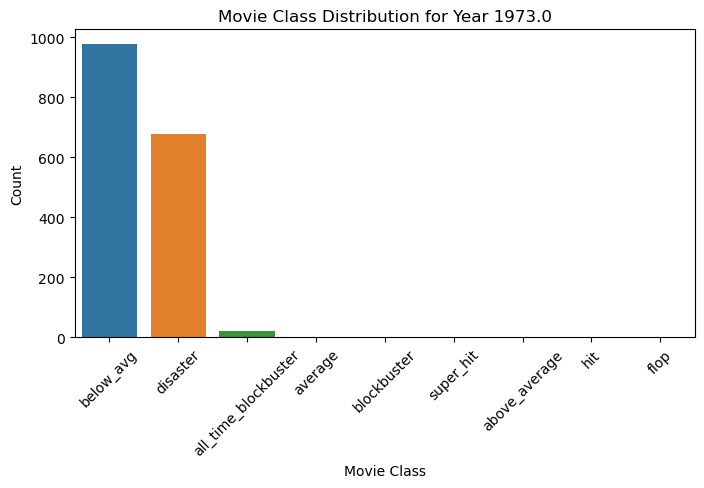

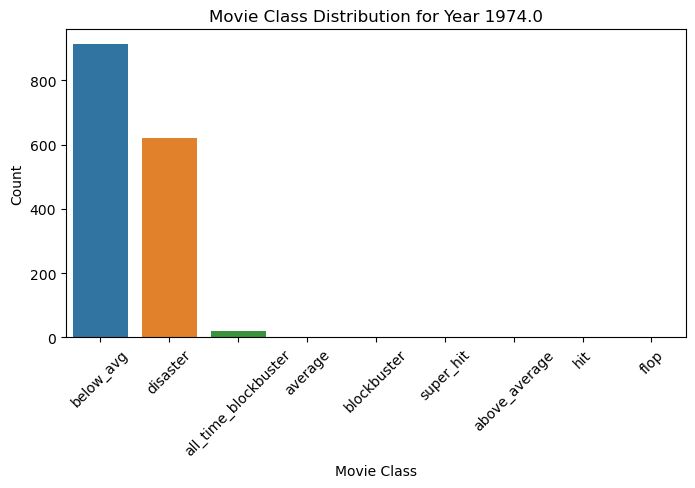

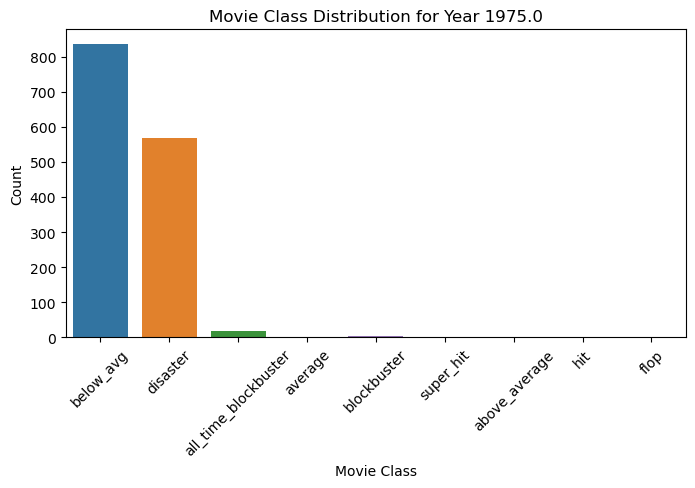

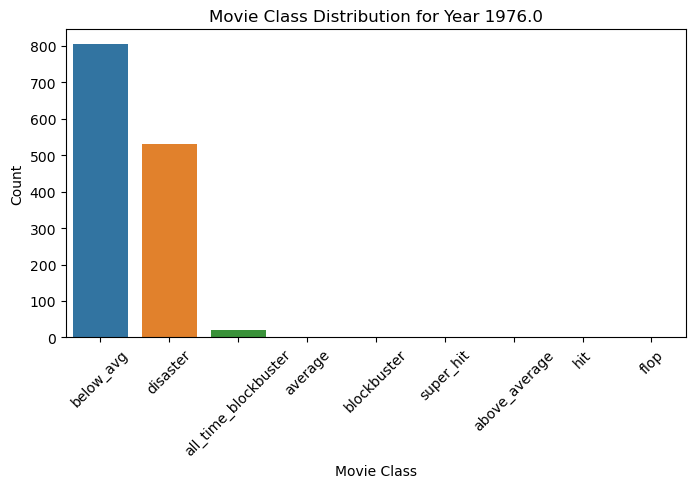

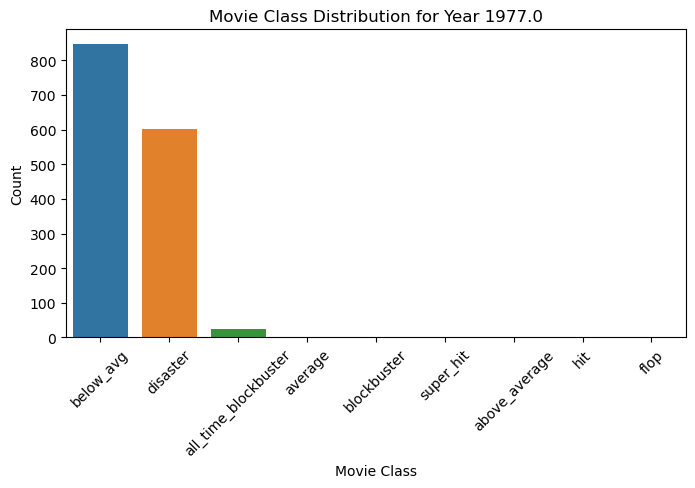

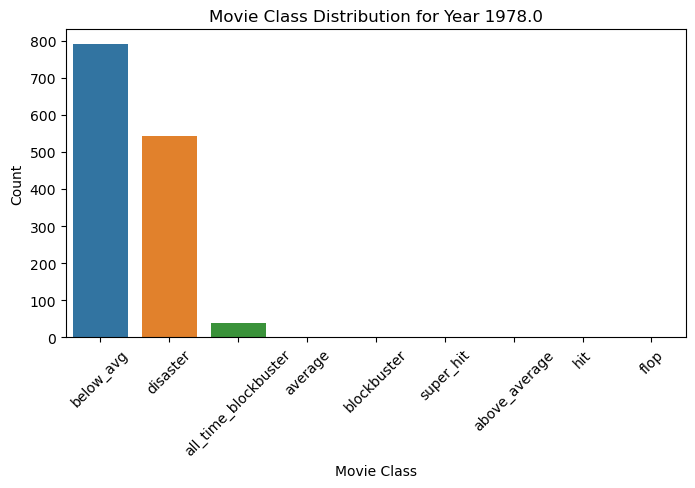

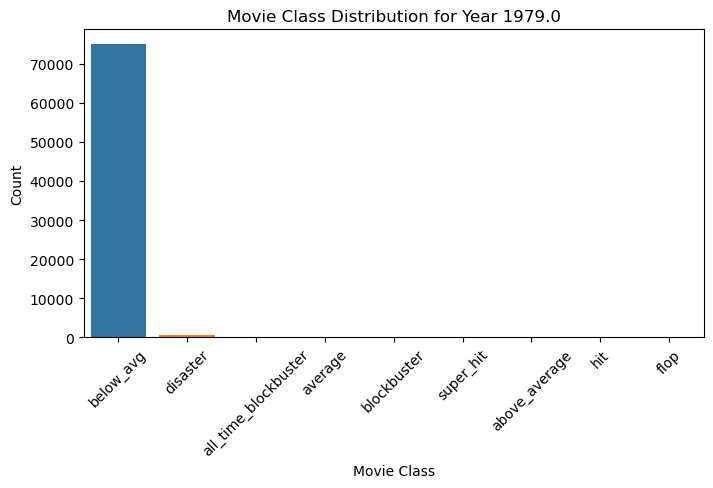

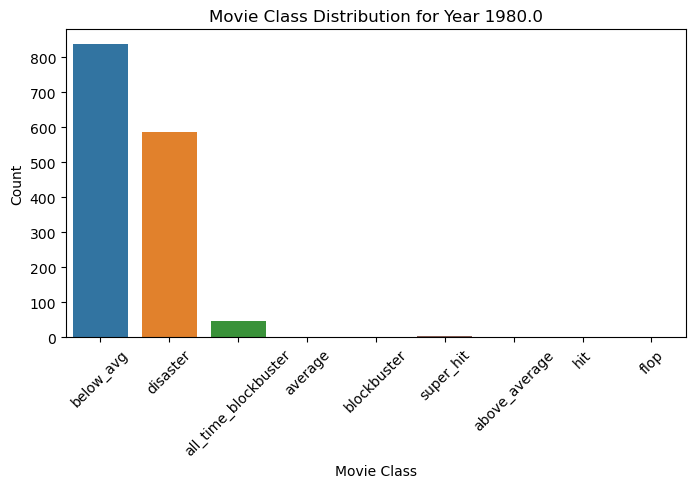

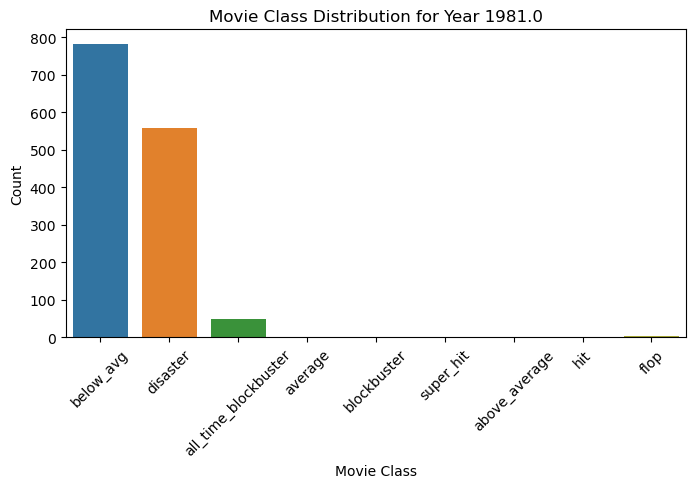

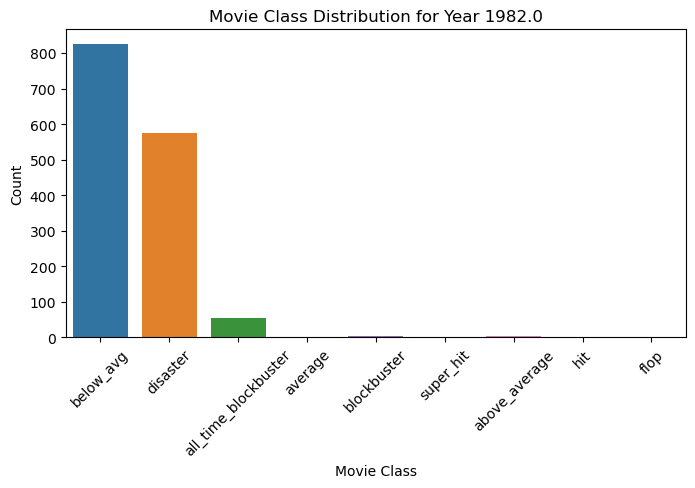

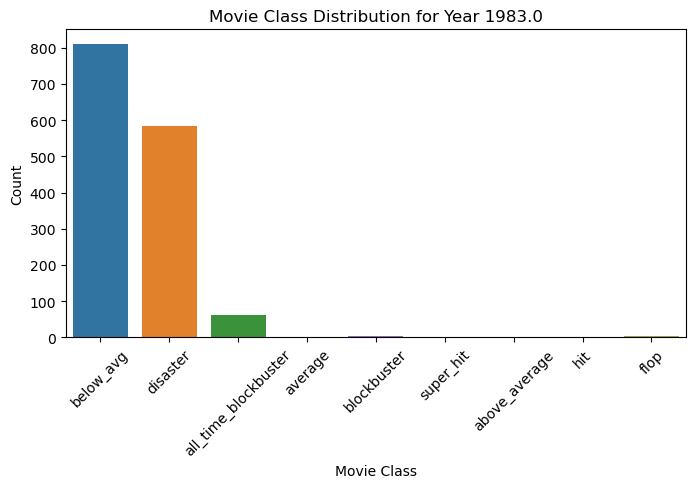

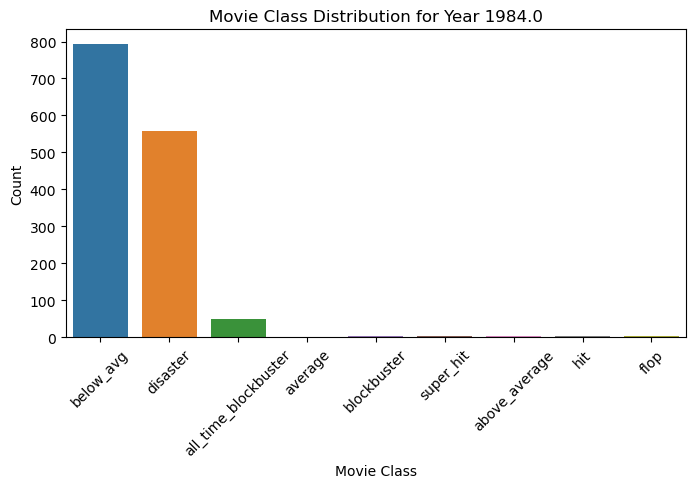

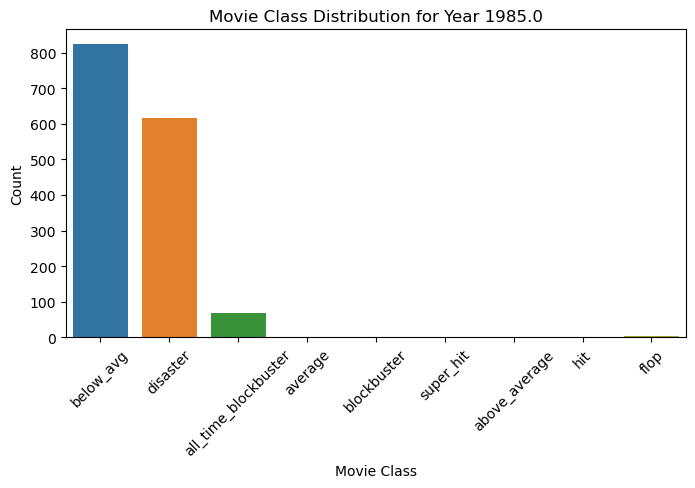

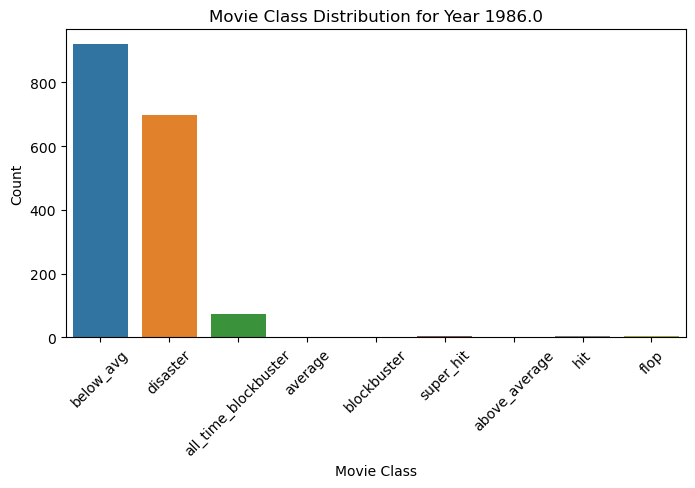

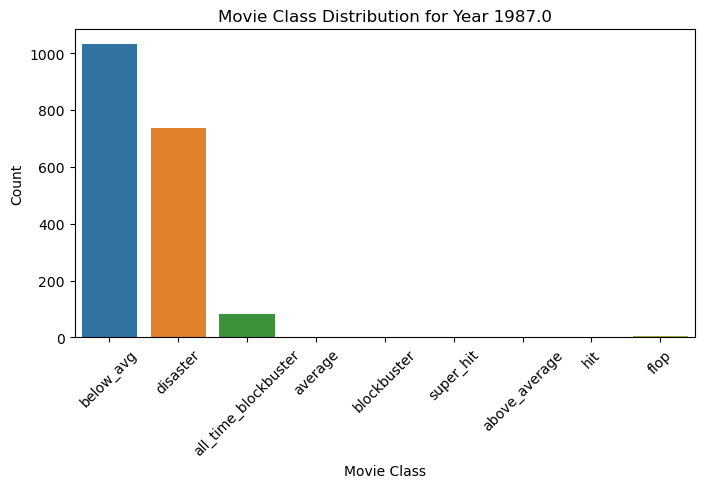

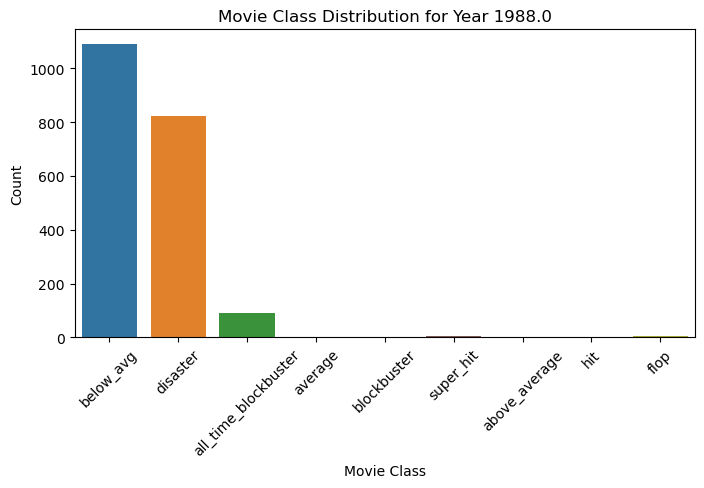

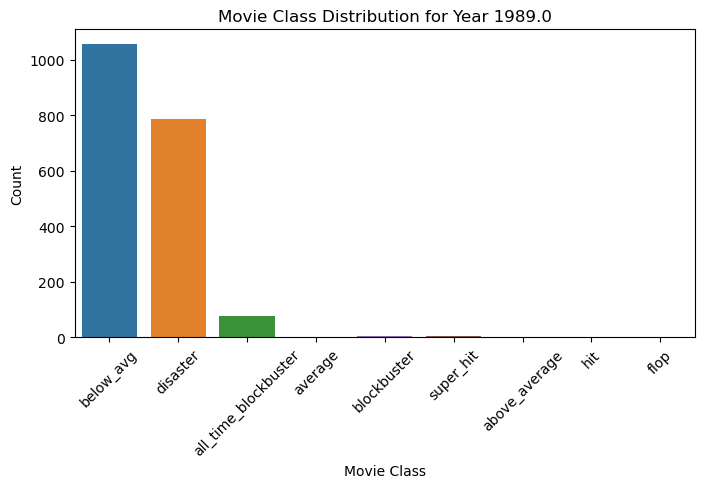

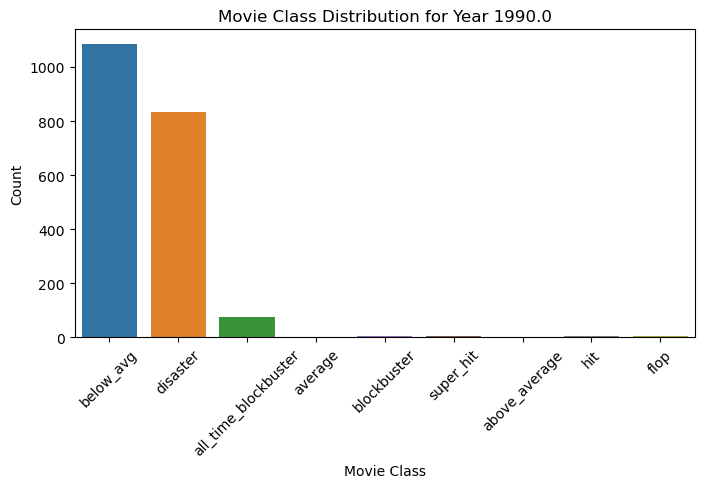

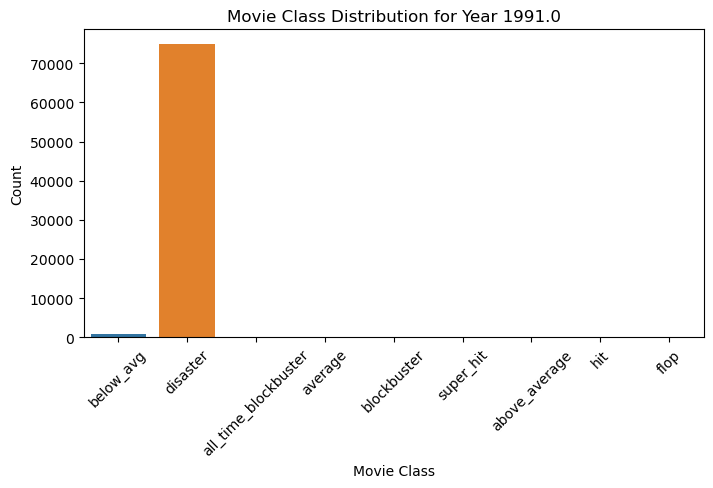

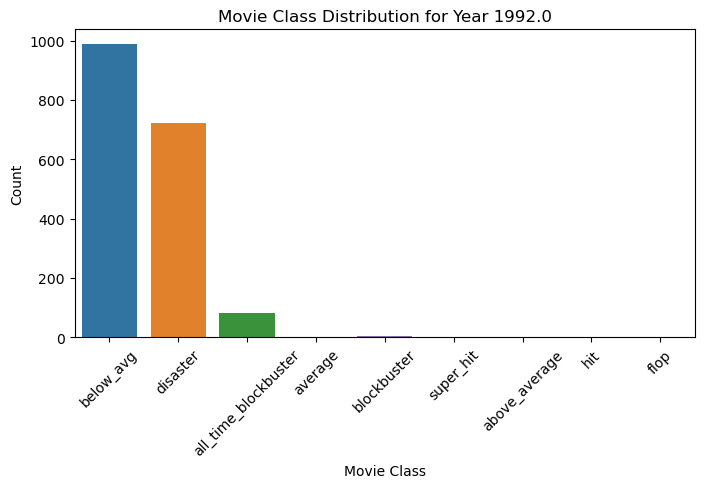

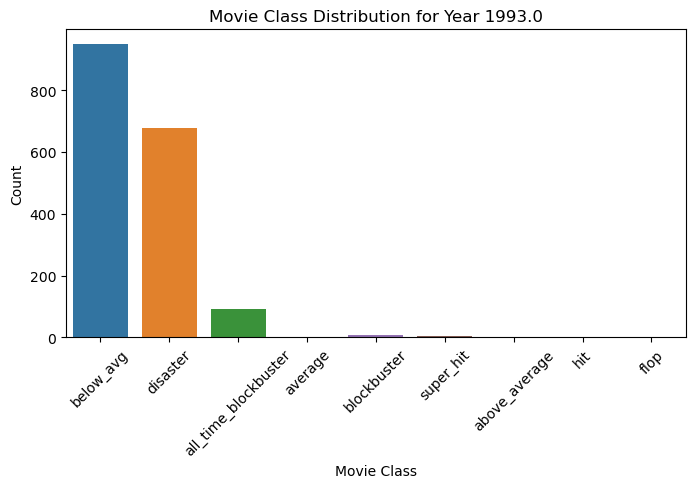

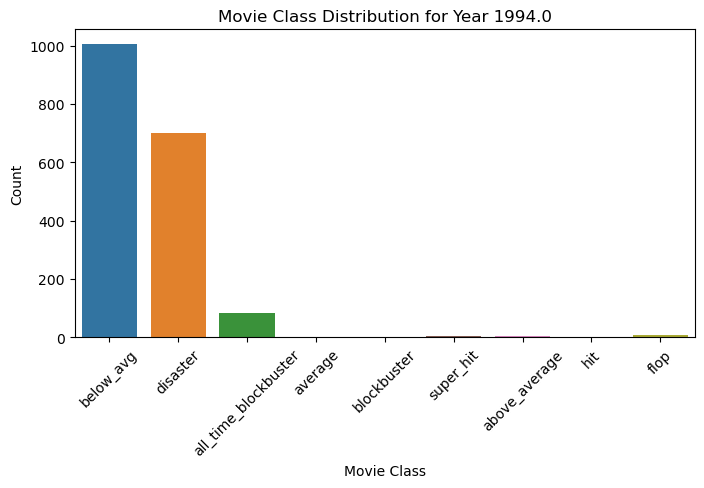

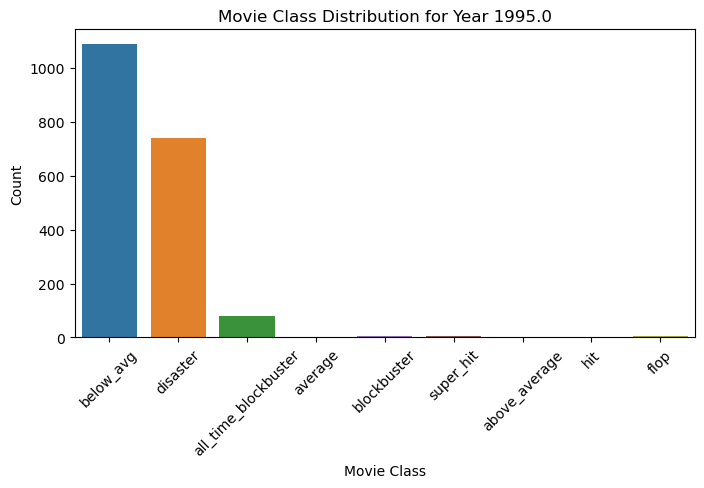

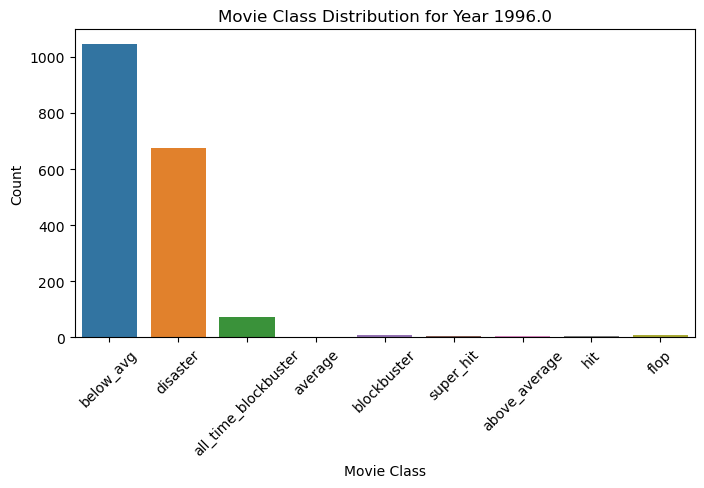

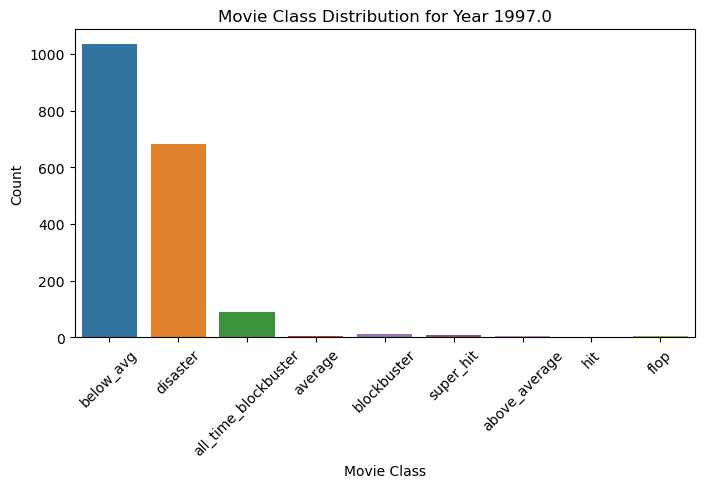

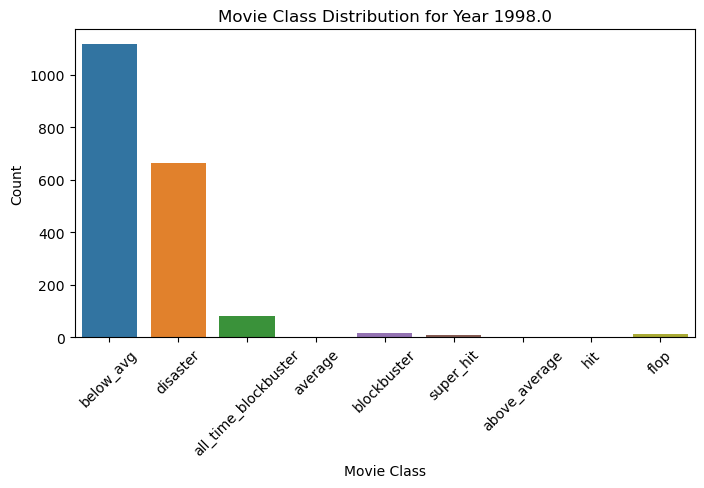

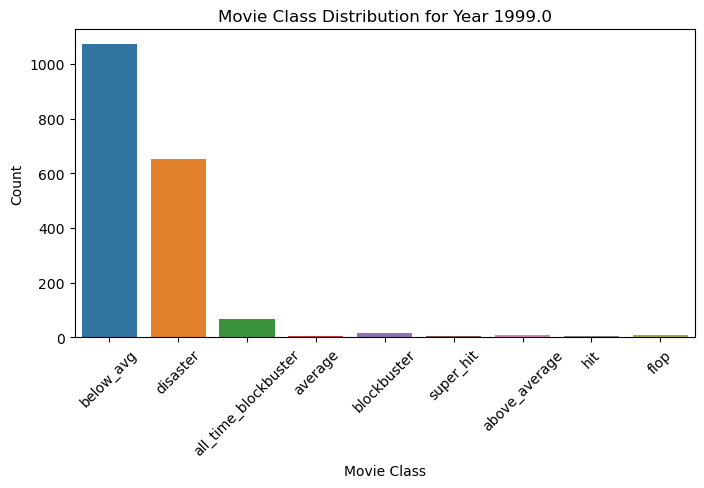

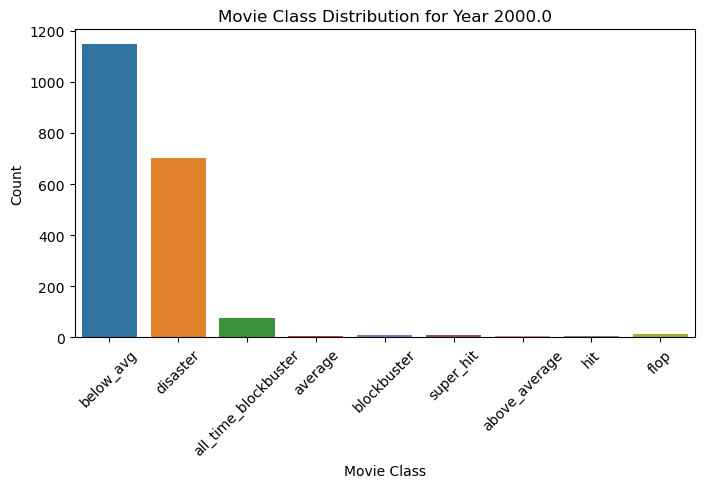

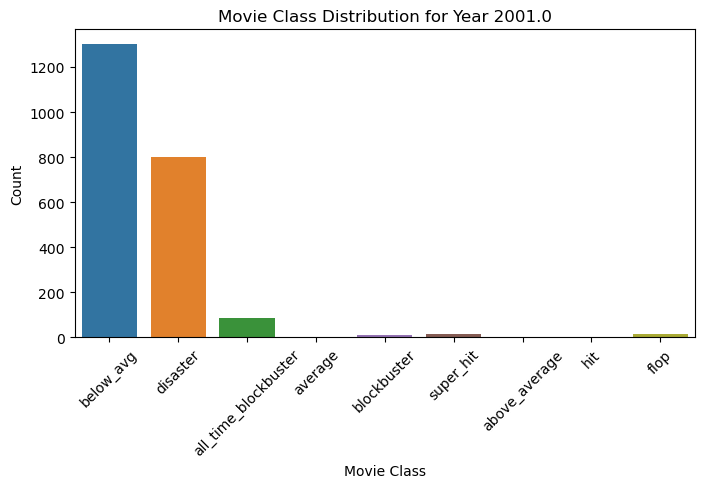

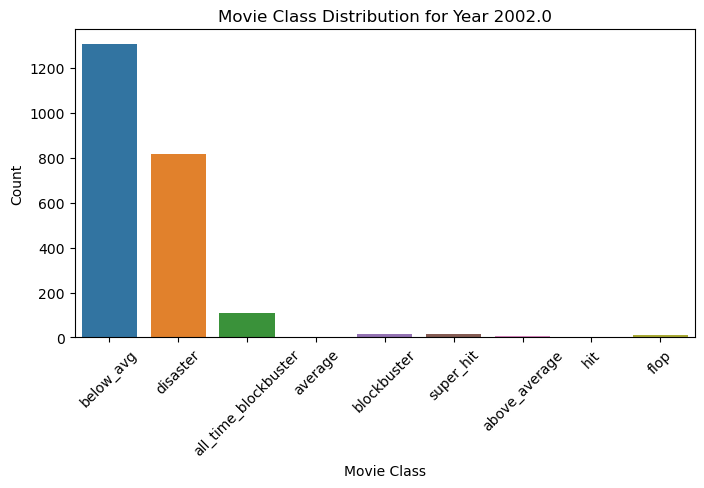

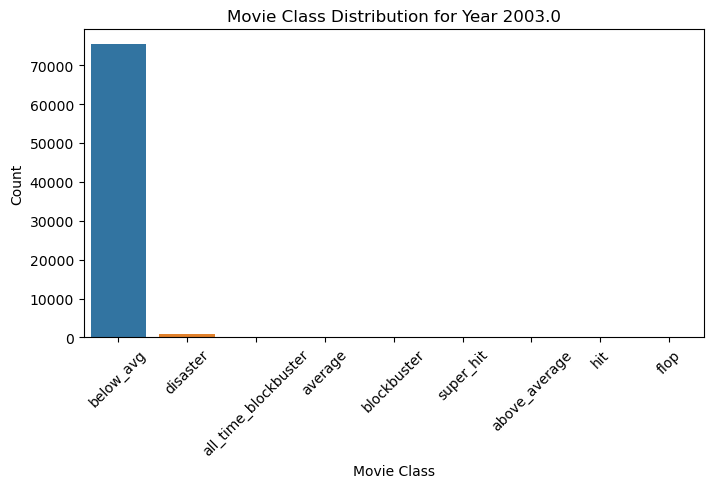

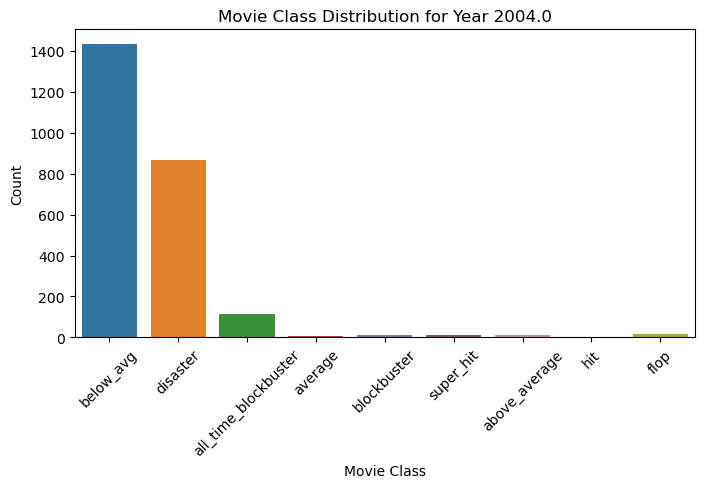

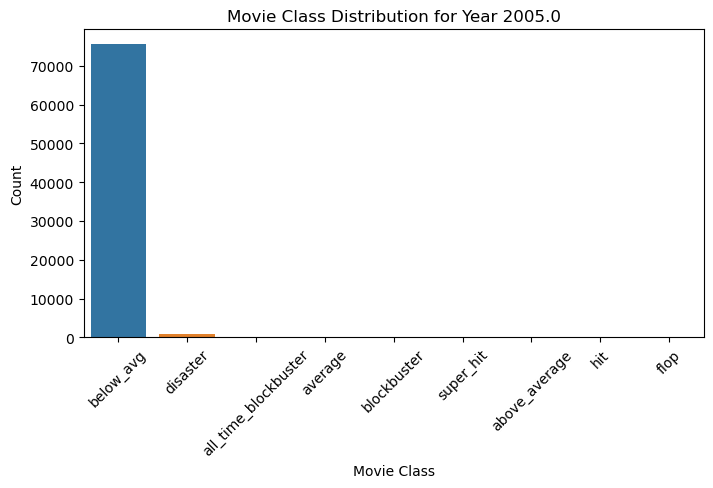

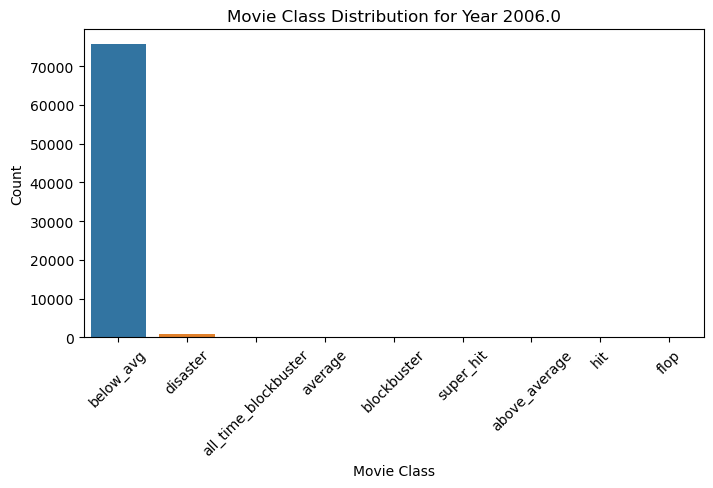

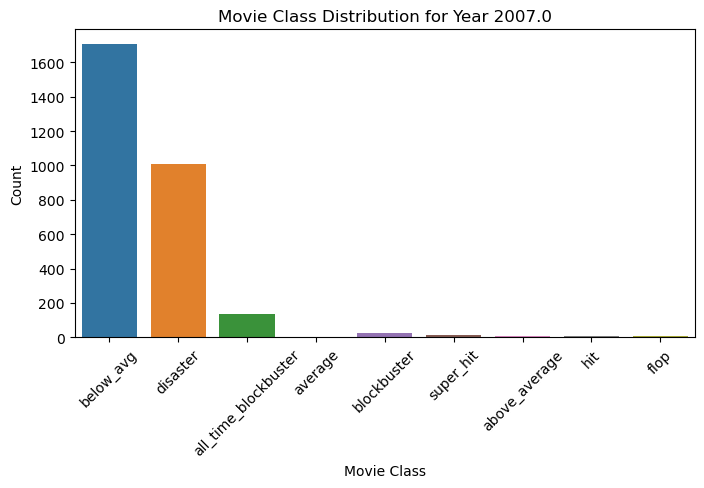

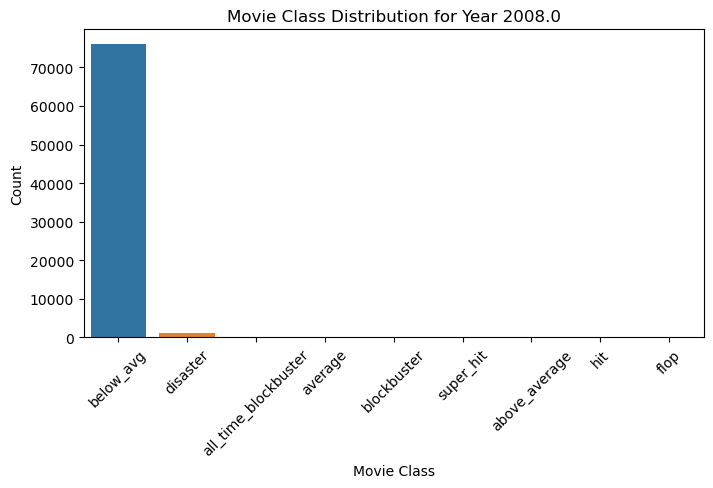

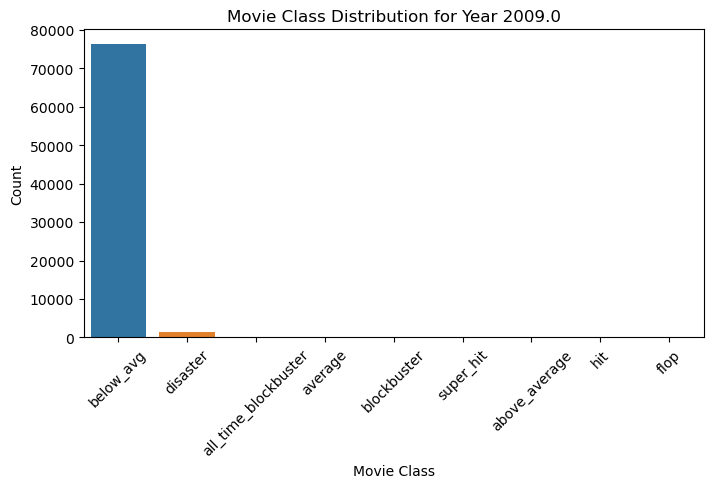

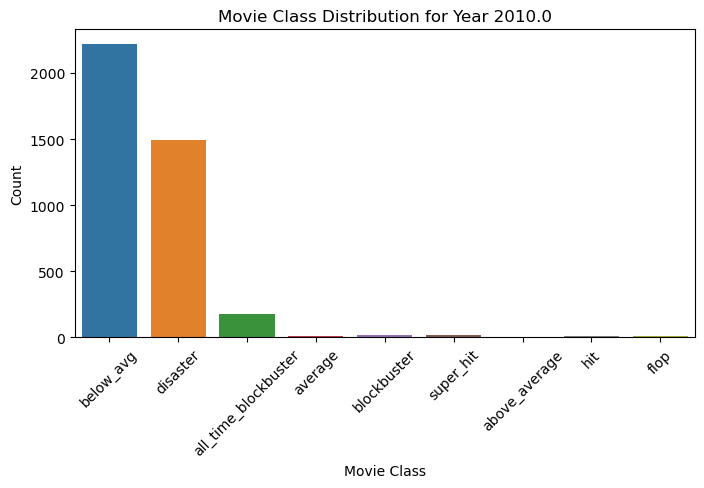

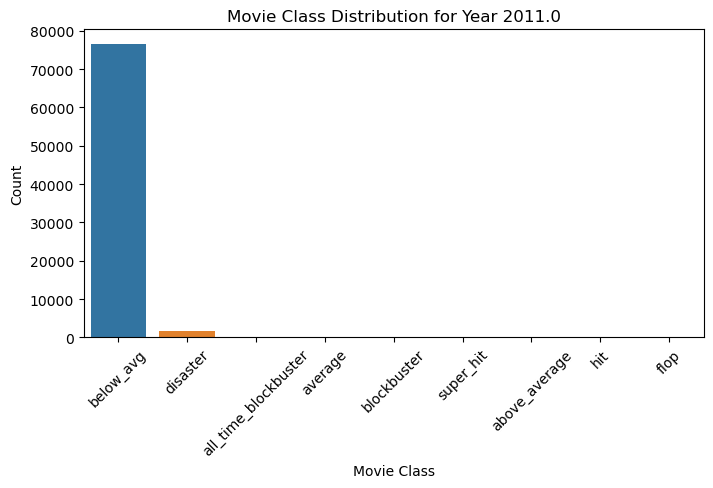

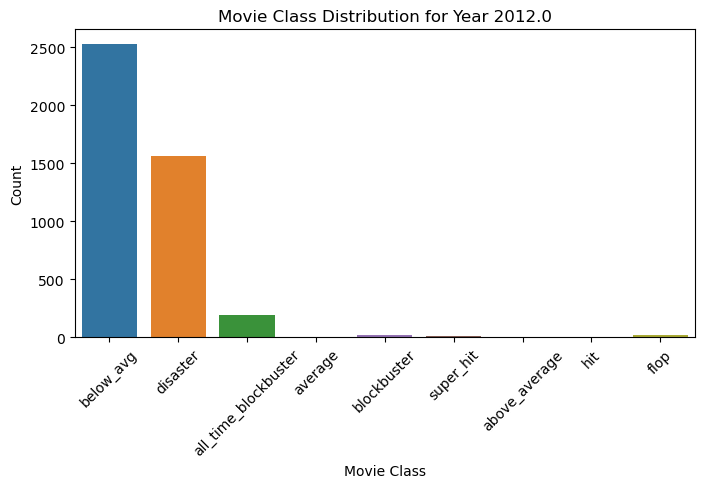

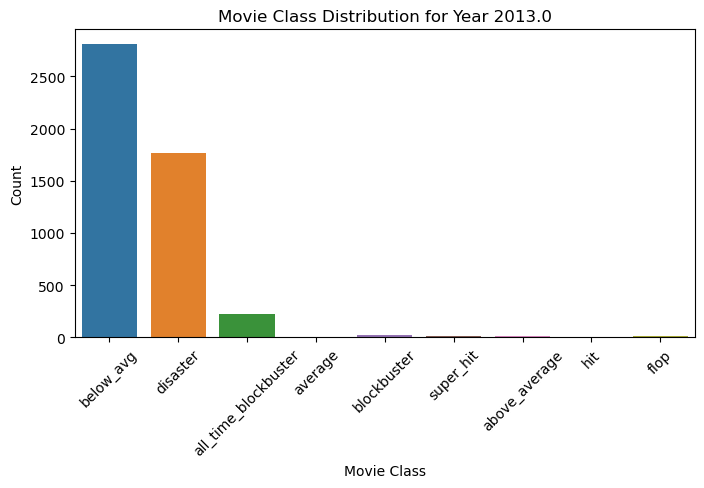

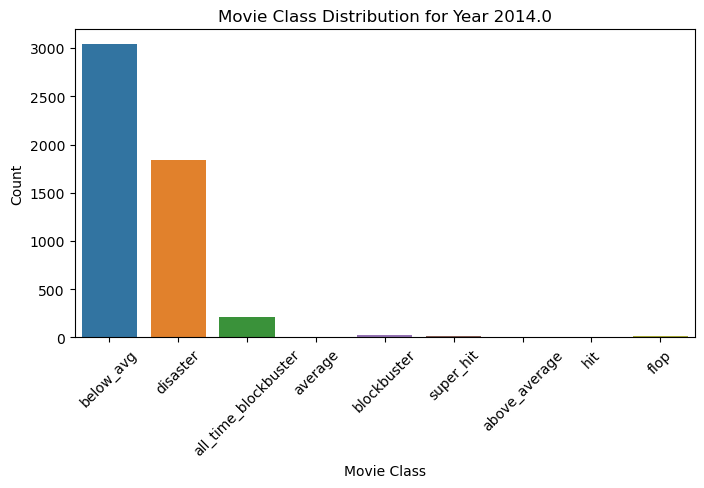

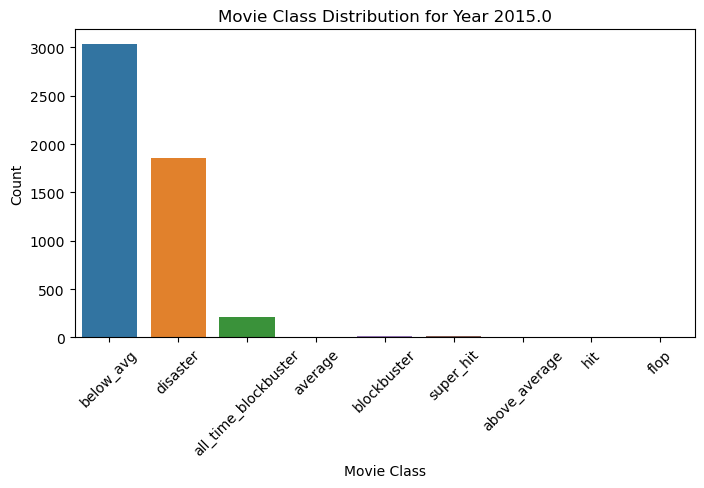

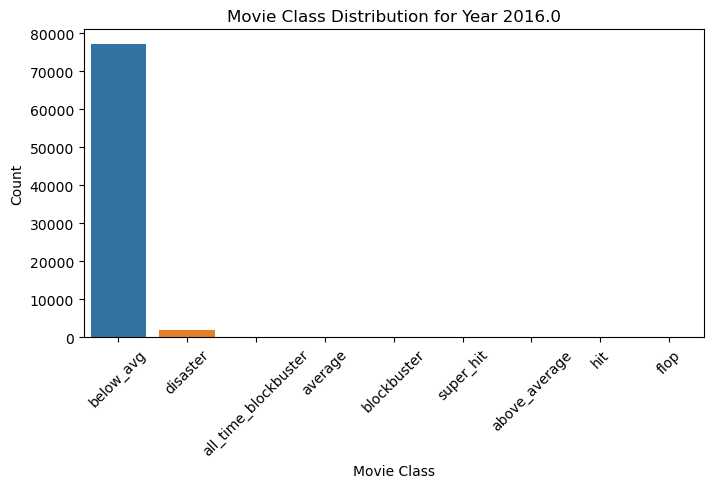

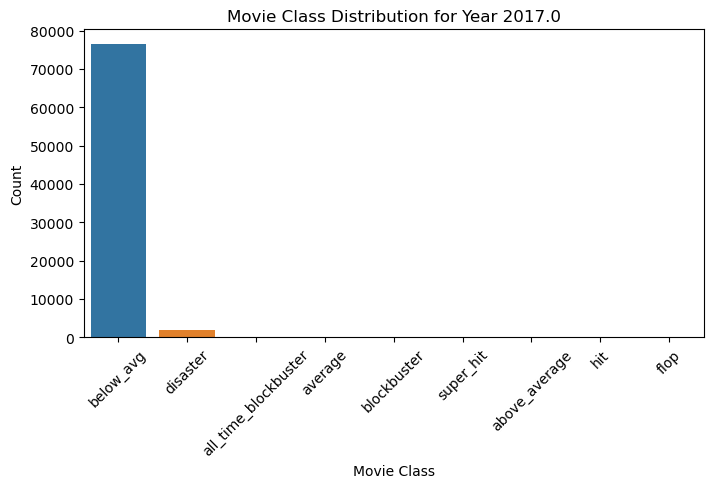

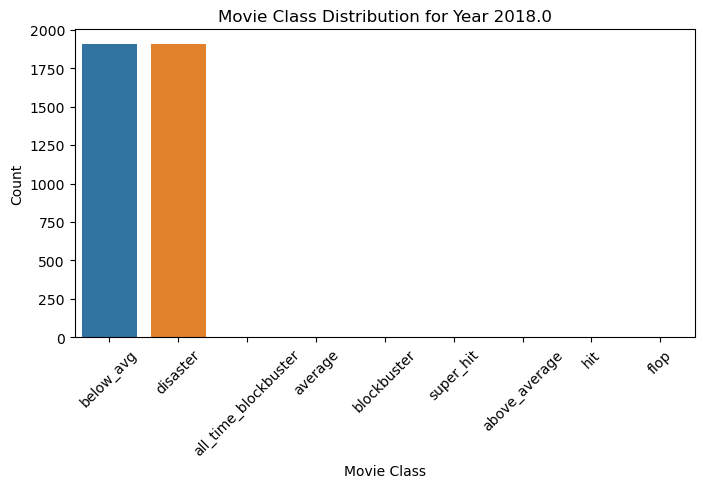

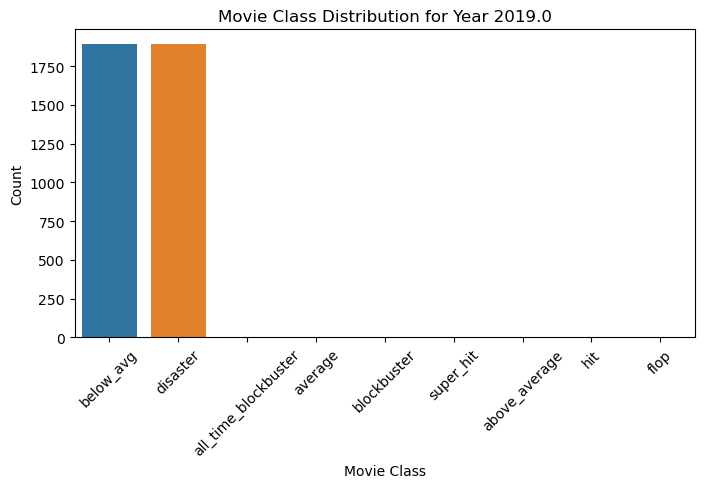

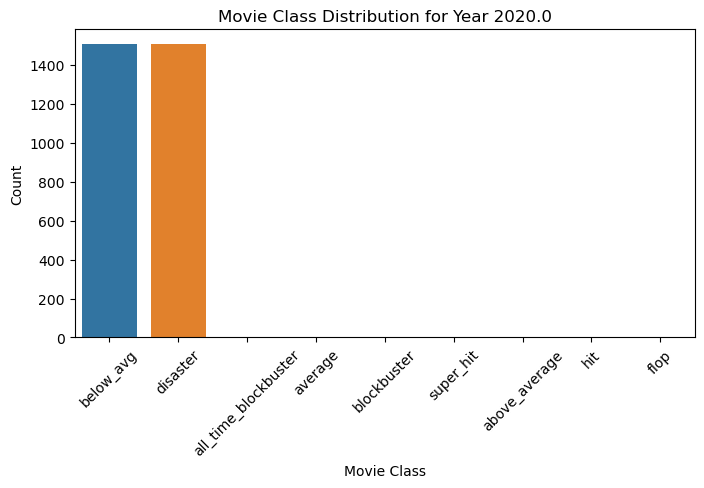

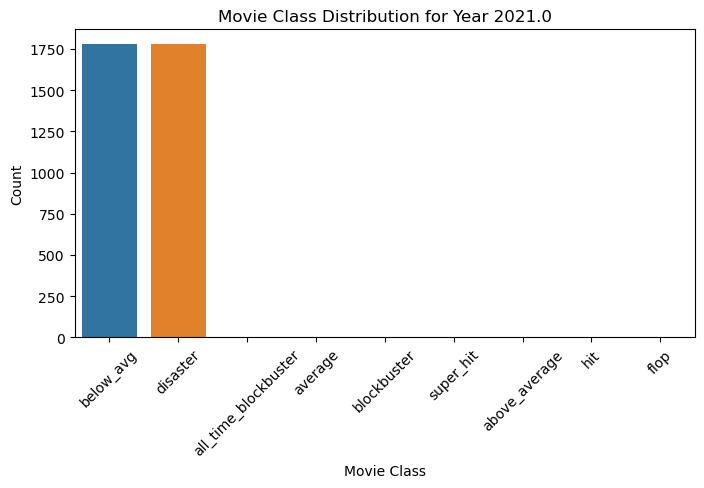

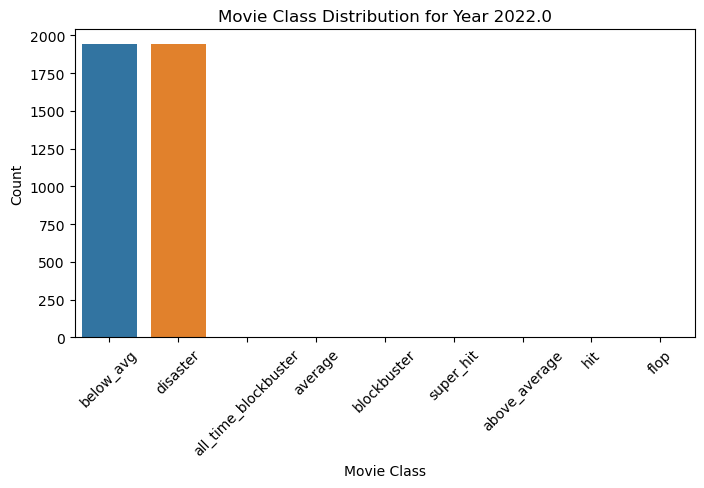

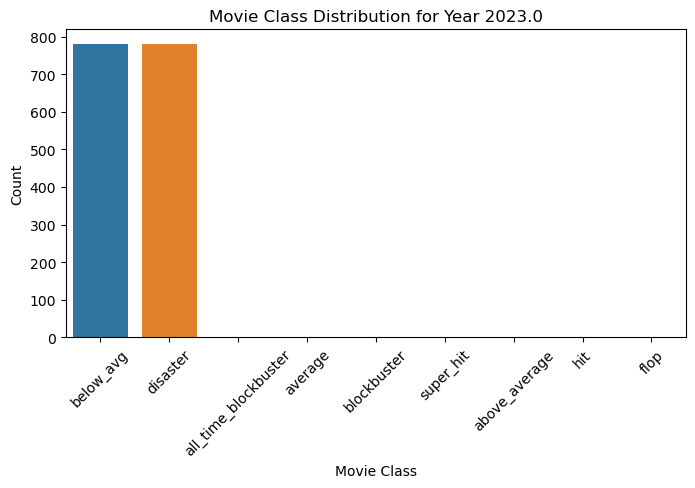

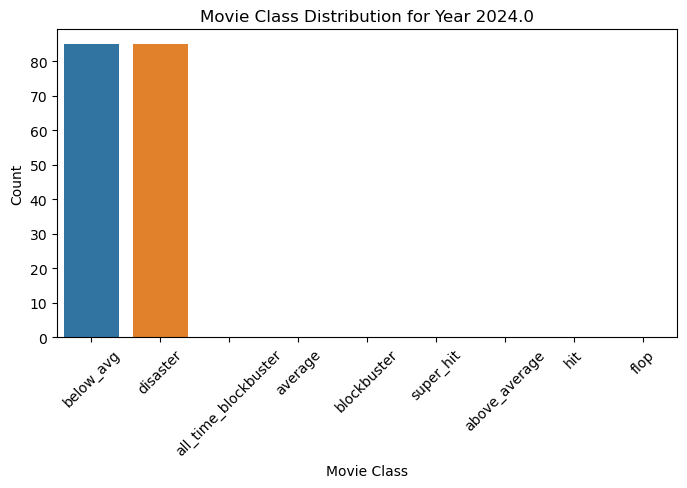

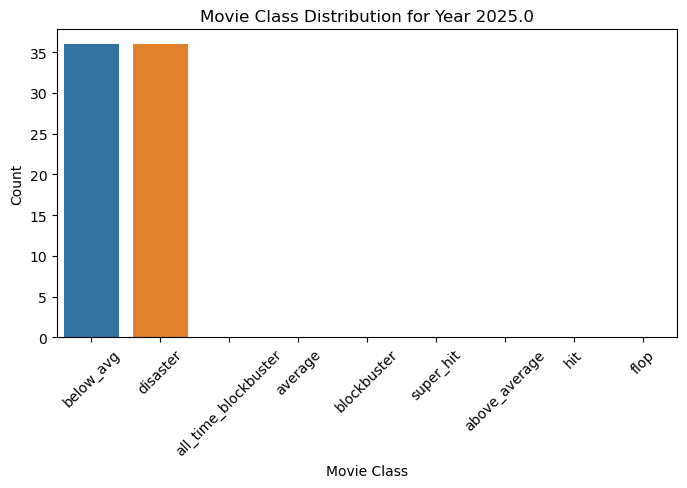

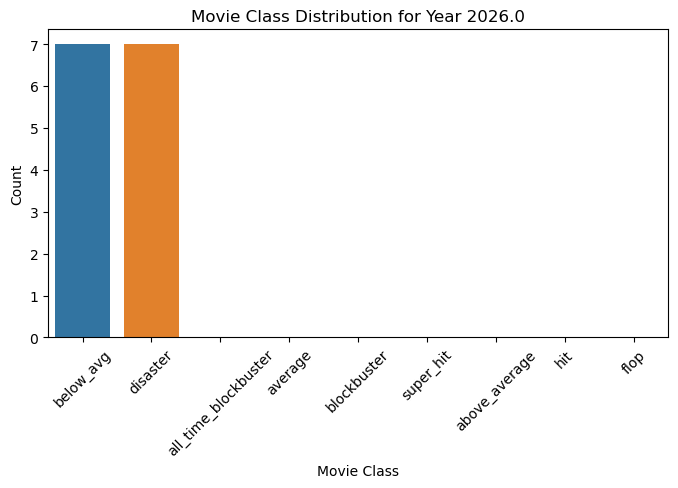

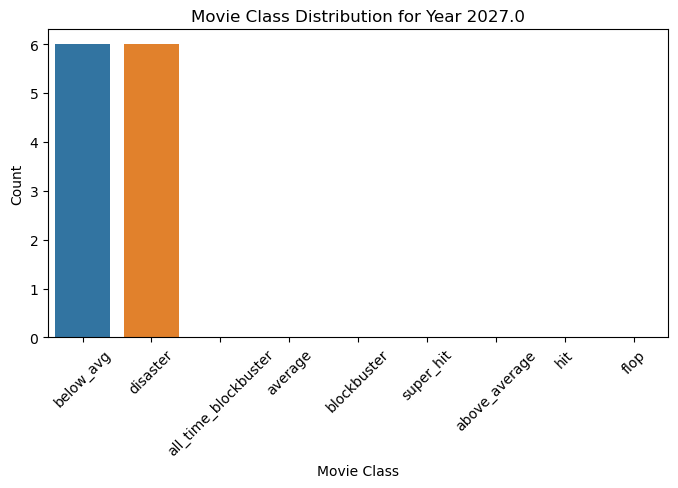

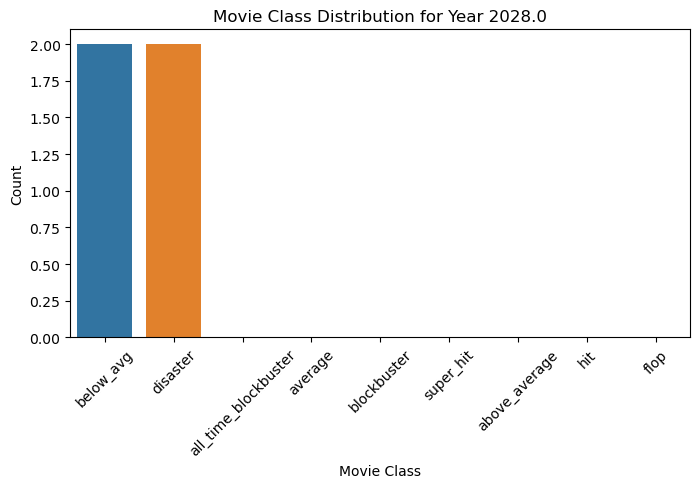

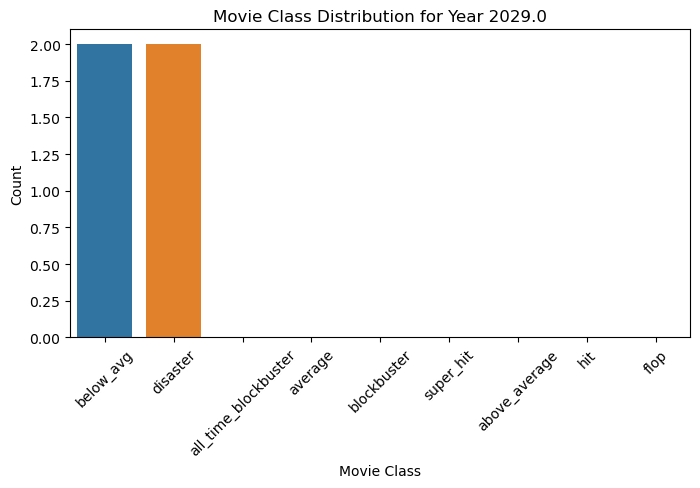

In [62]:
grouped = df.groupby(['release_year', 'movie_class']).size().reset_index(name='count')

years = grouped['release_year'].unique()
movie_classes = grouped['movie_class'].unique()

for year in years:
    data_for_year = grouped[grouped['release_year'] == year]
    
    # Reorder the data to ensure all movie classes are present
    data_for_year = data_for_year.pivot(index='movie_class', columns='release_year', values='count')
    data_for_year = data_for_year.reindex(movie_classes, fill_value=0)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=data_for_year.index, y=data_for_year[year])
    plt.xlabel('Movie Class')
    plt.ylabel('Count')
    plt.title(f'Movie Class Distribution for Year {year}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    
    plt.show()

#### Movie Class Trends Analysis based on release year

All Blockbuster Trend (1985-2012):

During the period from 1985 to 2012, the film industry saw a good portion of below average, then secondly disaster and a few substantial all-time blockbusters.

Majority Below Average and Disaster (1985-2012):

Throughout the same period (1985-2012), a majority of movies fell into the categories "Below Average" and "Disaster." There was also a significant share of movies that underperformed.

All Classes Have Count (1994-1997):

In the mid-1990s, specifically between 1994 and 1997, there was a distribution of movies across all classification categories though majoririty underperformed as many were classified as below average and disaster. This period seems to have offered diversity in movie performance.

All Disaster (1991):

In 1991, there was an unusual concentration of movies classified as "Disaster." This might indicate a challenging year for the film industry.

Mostly Below Average (2018):

In 2018, the majority of movies were categorized as "Below Average," suggesting a trend toward lower-performing films in that particular year but we could observe all other classes of success too.

All Classes (2007, 2004, 2010):

In 2004, 2007, and 2010, movies were well-observed across all classification categories. These years appeared to have a variety of movie types in terms of performance.

Below Average, Disaster, and All-Time Blockbuster (2012-2016):

Between 2012 and 2016, the film industry witnessed a mix of "Below Average," "Disaster," and "All-Time Blockbuster" movies, indicating a diverse range of performances during this period.

Equal Below Average and Disaster (2018-2023):

From 2018 to 2023, there was a balanced distribution of movies between "Below Average" and "Disaster." This suggests that during this time frame, the film industry produced a similar number of underperforming movies.

In summary, the trends in movie classifications from the provided data show fluctuations over the years, with some years dominated by specific categories, while others displayed a more diverse mix of movie performance. But over the years most movies grossed as below average or disasters with few all-time blockbuster and very very few flops, hits and average.

In [ ]:
df['release_month'] = df['release_date'].dt.month
interesting_columns.append('release_month')

### Yearly investment trend

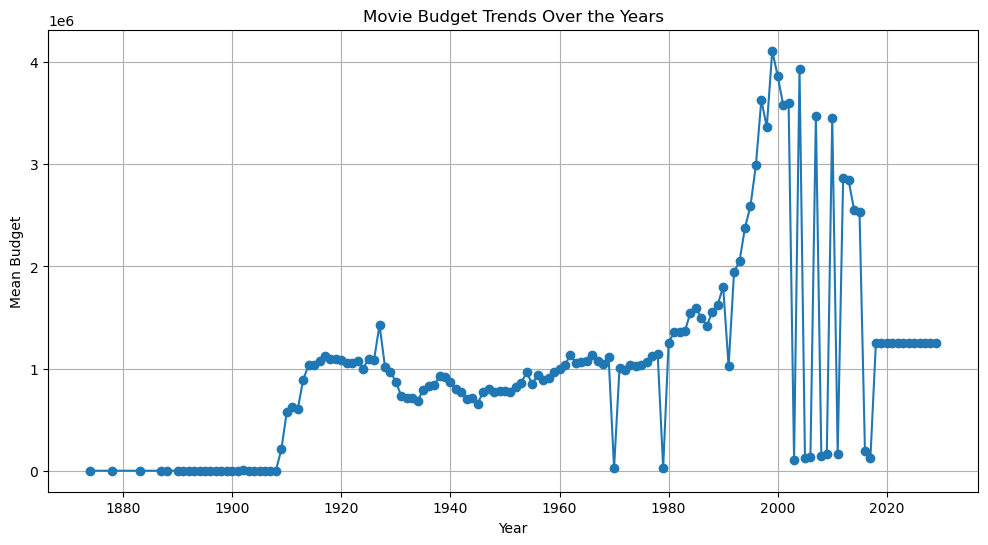

In [63]:
budget_by_year = df.groupby('release_year')['budget'].mean()

plt.figure(figsize=(12, 6))
plt.plot(budget_by_year.index, budget_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Budget')
plt.title('Movie Budget Trends Over the Years')
plt.grid(True)

plt.show()

The investment across the yeard seems to grow significantly with the highest in year around 2000 which decreased around 2020 which might be due to the outbreak of coronavirus. There is also a slight peak in the year around 1925 which major events such as transition from silent films to "talkies" with synchronized sound, which was a revolutionary development in cinema and prominent rise of Hollywood.

### Popularity of genres over the years

### Which genre is popular for each year?

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_4484/799906445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['release_decade'] = (df['release_year'] // 10) * 10


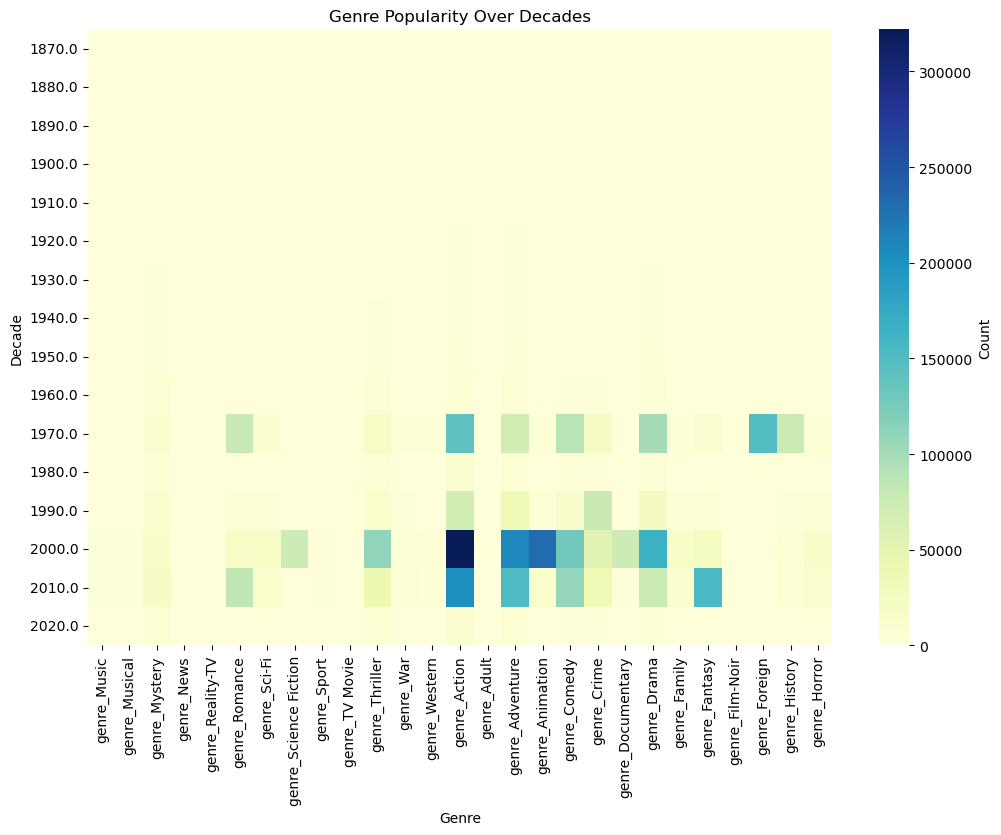

In [64]:
genre_columns=['genre_Music', 'genre_Musical',
       'genre_Mystery', 'genre_News', 'genre_Reality-TV', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Science Fiction', 'genre_Sport',
       'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western','genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_Film-Noir', 'genre_Foreign',
       'genre_History', 'genre_Horror']
genre_df = df[genre_columns]
genre_df['release_decade'] = (df['release_year'] // 10) * 10
genre_df = genre_df.groupby('release_decade').sum()

plt.figure(figsize=(12, 8))
sns.heatmap(genre_df, cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.xlabel('Genre')
plt.ylabel('Decade')
plt.title('Genre Popularity Over Decades')
plt.show()

In [65]:
df.to_csv('Data/eda.csv')

There seems to be growing trend of Action movies from 1970 to 2010 onwards with the highest in 2000 when many Marvel and DC movies were released. Adventure, Animation category also seems to gaining momentum wherease the trend of Foreign and history seem to decrease
The top genres appears to be Action, Adveture, Animation, Fantasy and Comedy